In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt5
#%matplotlib widget
from matplotlib.widgets import Slider, Button, CheckButtons

# Figures pour mémoire 

In [3]:
from matplotlib import ticker, rc

plt.rcParams['text.usetex'] = True
rc('xtick', labelsize=20) 
rc('ytick', labelsize=20) 
rc('font', size=25)

numfig = 0

In [4]:
def gauss(x,mean,sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mean)**2/(2*sigma**2))

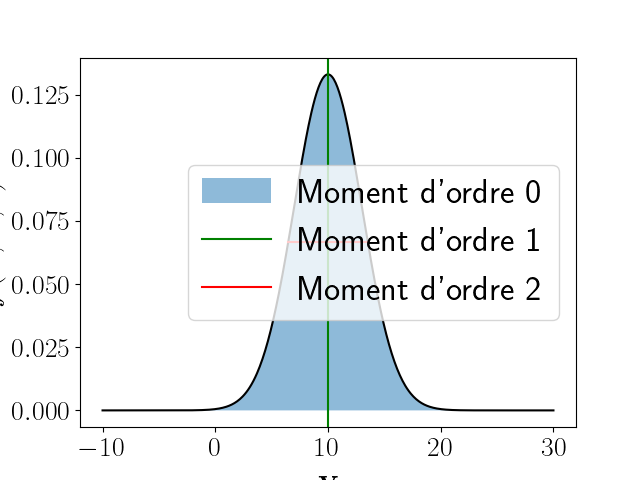

0.06648444636354495


In [5]:
x = np.linspace(-10,30,500)
mean = 10
sigma = 3
y = gauss(x,mean,sigma)
plt.figure(1)
plt.clf()
plt.plot(x,y,'k')
plt.fill(x,y,alpha=0.5,label="Moment d'ordre 0")
plt.axvline(mean,color='g',label="Moment d'ordre 1")
plt.plot([mean-np.sqrt(2*np.log(2))*(sigma),mean+np.sqrt(2*np.log(2))*(sigma)],[np.max(y)/2,np.max(y)/2],color='r',label="Moment d'ordre 2")
plt.xlabel("$\mathbf{v}$")
plt.ylabel('$f(\mathbf{x},\mathbf{v},t)$')
plt.legend()
plt.show()
print(np.max(y)/2,)

In [6]:
def ap_from_firehose(betap,param=1):
    return 1 - 2*param/betap
def betap_from_miroir(ap,param=6):
    return -1/(ap*(1-ap/param))

In [7]:
betap = np.arange(0.01,100,0.005)
ap_firehose = ap_from_firehose(betap)
ap_firehoseinv = ap_from_firehose(betap,2/3)
ap_mode = ap_from_firehose(betap,3/4)

In [8]:
ap = np.arange(1e-3,100,0.0005)
beta_miroirk = betap_from_miroir(ap,1)
beta_miroirf = betap_from_miroir(ap,6)

/tmp/ipykernel_17797/3965004485.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return -1/(ap*(1-ap/param))


In [9]:
plt.figure(1)
plt.clf()
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-2,1e0)
plt.xlim(1e0,1e1)
plt.xlabel('$\\beta_{\\parallel 0}$')
plt.ylabel('$a_{p0}$')
plt.plot(betap,ap_firehose,label='$F=0$')
plt.plot(betap,ap_firehoseinv,label='$G = 0$')
plt.plot(betap,ap_mode,'k',label='$F = G$')
#plt.plot(beta_miroirf[beta_miroirf>0],ap[beta_miroirf>0],label='miroir CGL')
plt.scatter([betap_cases]*5,ap_cases,marker='+',color='red', label='cas étudiés')
plt.fill_between(betap,ap_firehoseinv,1e2,facecolor='orange',alpha=0.1,label='$G<0$')
#plt.fill_between(betap,ap_mode,ap_firehoseinv,facecolor='blue',alpha=0.3,label='instable oblique firehose\n (cas Finf)')
#plt.fill_between(betap,ap_firehose,ap_mode,facecolor='orange',alpha=0.3,label='instable oblique firehose\n inverse (cas Isup)')
plt.fill(betap,ap_firehose,facecolor='blue',alpha=0.1,label='$F<0$')
plt.legend(labelspacing=0.3,loc = 'lower right',ncol=1,)#title="Critères d'instabilités"
plt.show()

NameError: name 'betap_cases' is not defined

In [10]:
plt.figure(1)
plt.clf()
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,1e2)
plt.xlim(1e-2,1e2)
plt.xlabel('$\\beta_{\\parallel 0}$')
plt.ylabel('$a_{p0}$')
plt.plot(betap,ap_firehose,label='firehose')
plt.plot(beta_miroirf[beta_miroirf>0],ap[beta_miroirf>0],label='miroir CGL')
plt.plot(beta_miroirk[beta_miroirk>0],ap[beta_miroirk>0],label='miroir cinétique')
plt.fill_between(beta_miroirf[beta_miroirf>0],ap[beta_miroirf>0],firehose(beta_miroirf,1)[beta_miroirf>0],color='grey',alpha=0.2)
plt.axhline(1,linestyle='-.',color='grey')
plt.legend(title="Critères d'instabilités")
plt.show()

NameError: name 'firehose' is not defined

In [11]:
def firehose(ap,betap):
    return 1 - betap/2*(1-ap)

def firehoseinv(ap,betap):
    return 3*betap/2*(1-ap)-2

def mirror(ap,betap):
    return 1+betap*ap*(1-1/6*ap)

def omega_alfven(ap,betap,theta,vAk=1): #*np.cos(theta)
    return vAk*np.sqrt((1+0j)*firehose(ap,betap))*np.ones(np.shape(theta))

def omega_alfven_perp(ap,betap,theta,vAk=1): #*np.cos(theta)
    return vAk*np.sqrt((1+0j)*firehoseinv(ap,betap))*np.ones(np.shape(theta))

def omega_new(ap,betap,theta,vAk=1):  #*np.cos(theta)
    return vAk*np.sqrt((1+0j)*(-2*firehose(ap,betap)*np.cos(theta)*np.cos(theta)+firehoseinv(ap,betap)*np.sin(theta)*np.sin(theta))/(np.sin(theta)*np.sin(theta)-2*np.cos(theta)*np.cos(theta)))

def A(ap,betap,theta):
    #return 1 + betap*ap*(1-1/2*np.cos(theta)*np.cos(theta)) + betap*np.cos(theta)*np.cos(theta)
    return np.sin(theta)*np.sin(theta)*(1+ap*betap)+np.cos(theta)*np.cos(theta)*(1+betap+ap*betap/2)

def B(ap,betap,theta):
    return 3/2*betap*np.cos(theta)*np.cos(theta)*(np.cos(theta)*np.cos(theta)*(firehose(ap,betap)) + np.sin(theta)*np.sin(theta)*(mirror(ap,betap)))

def delta(ap,betap,theta):
    return A(ap,betap,theta)*A(ap,betap,theta)-4*B(ap,betap,theta)

def omega_fast(ap,betap,theta,vAk=1):
    return vAk*np.sqrt((1+0j)*(A(ap,betap,theta)+np.sqrt(delta(ap,betap,theta))))/np.sqrt(2)

def omega_slow(ap,betap,theta,vAk=1):
    return vAk*np.sqrt((1+0j)*(A(ap,betap,theta)-np.sqrt(delta(ap,betap,theta))))/np.sqrt(2)


In [14]:
vAk = 1 
theta = np.linspace(0,np.pi/2,1000)
theta_cases = np.array([0,10/180*np.pi,45/180*np.pi,90/180*np.pi,np.pi/2])
ap =  np.arange(1e-2,100,1e-2)
ap_cases = np.array([0.05,0.2,0.325,0.38,0.5])
betap = np.arange(1e-2,100,1e-2)
betap_cases =np.array([20/9]) #np.array([0.1,1,10])

/home/simon/venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


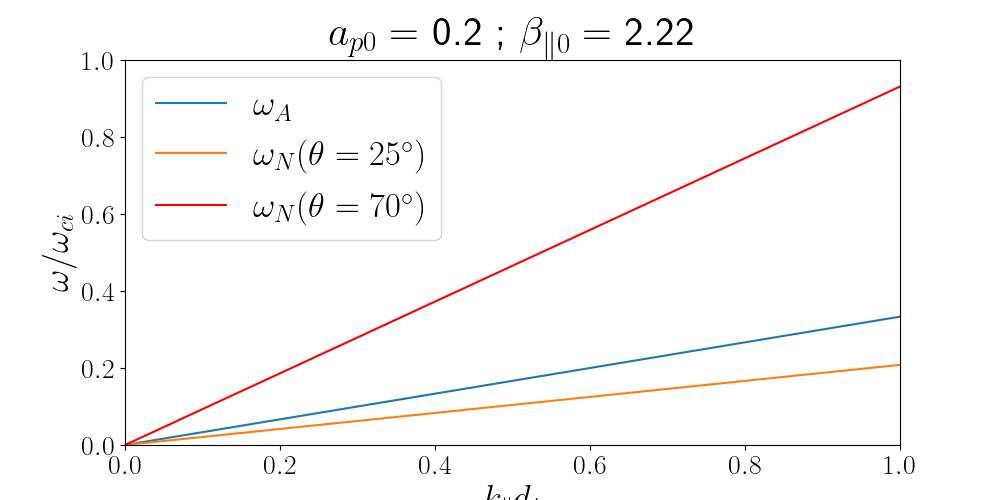

In [13]:
plt.figure(3,figsize=(10,5))
plt.clf()
x = np.linspace(0,10,1000)
beta = 20/9
ap = 0.2
plt.title("$a_{p0}=$ "+f'{ap} ; '+"$\\beta_{\\parallel 0}=$ "+f'{beta:.2f}')

theta = 25/180*np.pi
yA30 = omega_alfven(ap,beta,theta,x)
yN30 = omega_new(ap,beta,theta,x)
theta = 70/180*np.pi
yA60 = omega_alfven(ap,beta,theta,x)
yN60 = omega_new(ap,beta,theta,x)
plt.plot(x,yA30,label='$\omega_A$')
plt.plot(x,yN30,label='$\omega_N (\\theta = 25^{\circ})$')
plt.plot(x,yN60,'r',label='$\omega_N (\\theta = 70^{\circ})$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('$k_{\parallel} d_i$')
plt.ylabel('$\omega/\omega_{ci}$')
plt.legend()
plt.show()

In [5]:
print(omega_alfven(1,1,theta,vAk)[0])
print(omega_slow(1,1,theta,vAk)[0])
print(omega_fast(1,1,theta,vAk)[0])

(1+0j)
(1+0j)
(1.224744871391589+0j)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

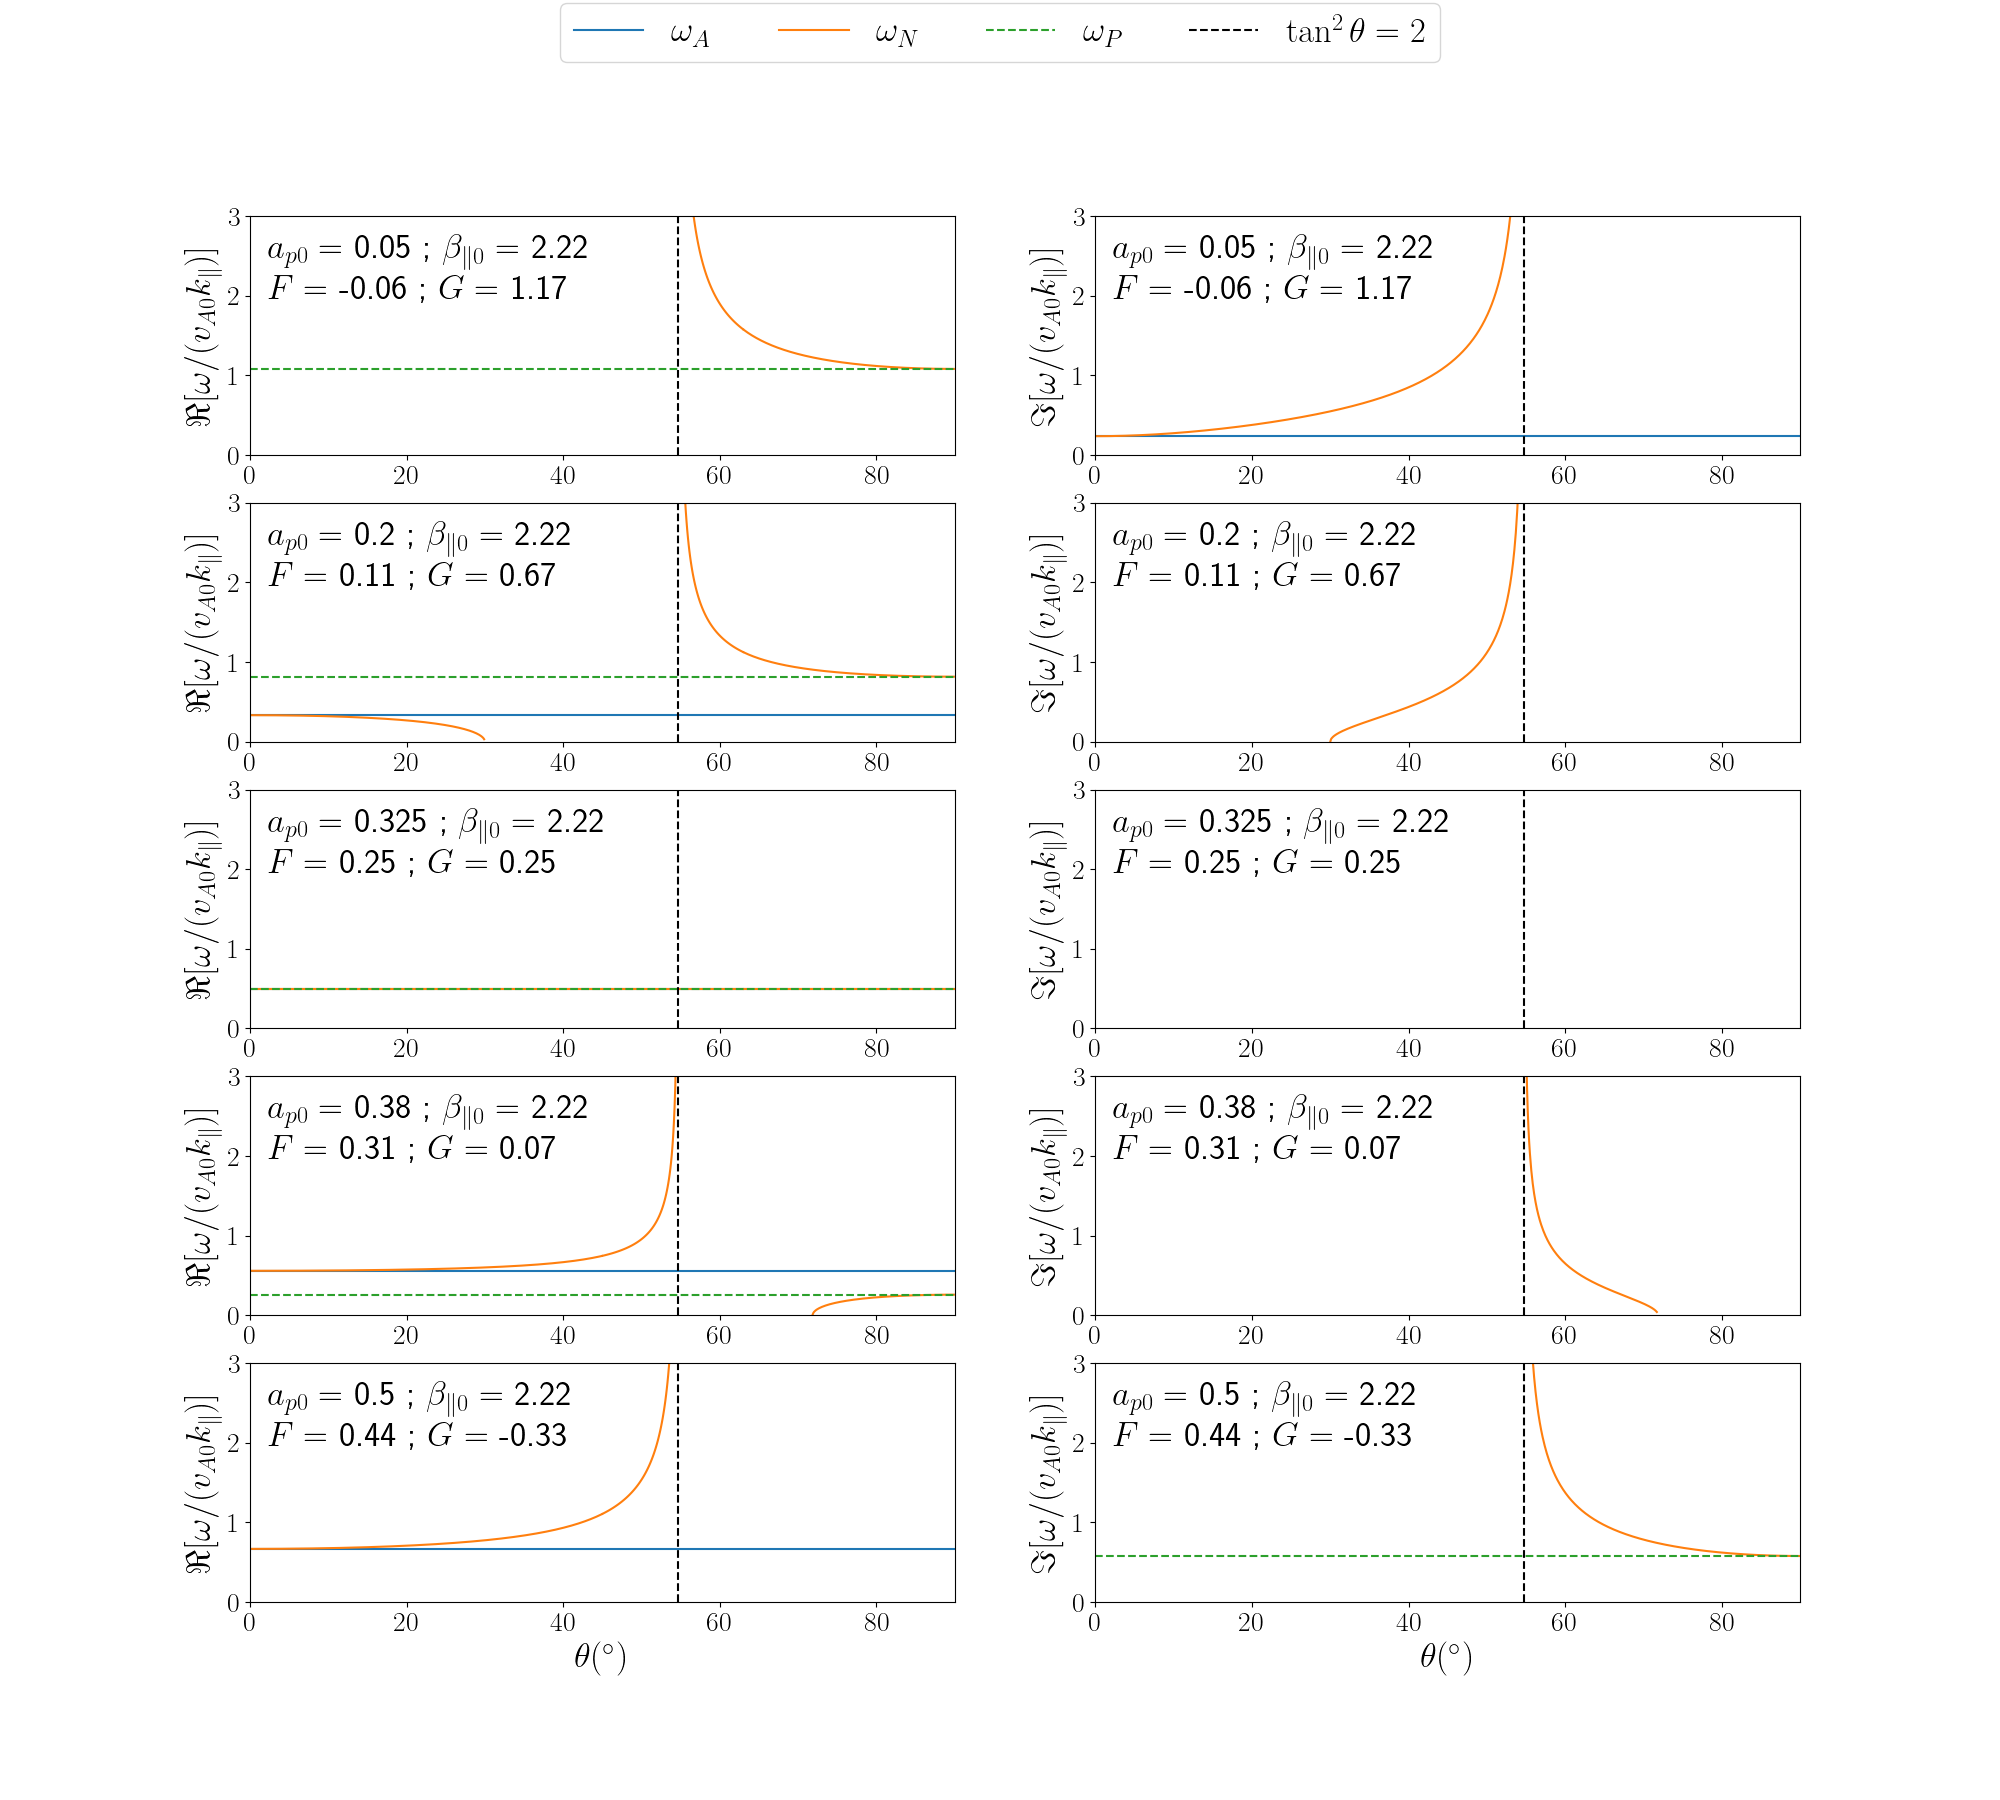

In [12]:
plt.figure(5,figsize=(20,18))
plt.clf()
x = theta*180/np.pi
for i in range(len(ap_cases)):
    for j in range(len(betap_cases)):
        ya = omega_alfven(ap_cases[i],betap_cases[j],theta,vAk)
        yp = omega_alfven_perp(ap_cases[i],betap_cases[j],theta,vAk)
        yn = omega_new(ap_cases[i],betap_cases[j],theta,vAk)
        ys = omega_slow(ap_cases[i],betap_cases[j],theta,vAk)
        yf = omega_fast(ap_cases[i],betap_cases[j],theta,vAk)
        
        plt.subplot(len(ap_cases),len(betap_cases)*2,i*len(betap_cases)*2+j+1)
        l1, = plt.plot(x[np.imag(ya)==0][0:-1],np.abs(np.real(ya)[np.imag(ya)==0])[0:-1])#,label='Alfvén'
        l2, = plt.plot(x[0:500][np.imag(yn[0:500])==0],np.abs(np.real(yn)[0:500][np.imag(yn[0:500])==0]))#,label='New'
        plt.plot(x[500:700][np.imag(yn[500:700])==0],np.abs(np.real(yn)[500:700][np.imag(yn[500:700])==0]),color=l2.get_color())#,label='New'
        plt.plot(x[700:-1][np.imag(yn[700:-1])==0],np.abs(np.real(yn)[700:-1][np.imag(yn[700:-1])==0]),color=l2.get_color())#,label='New'
        l3, = plt.plot(x[np.imag(yp)==0][0:-1],np.abs(np.real(yp)[np.imag(yp)==0])[0:-1],linestyle='dashed')#,label='Alfvén'
        #l3, = plt.plot(x[np.imag(ys)==0][0:-1],np.abs(np.real(ys)[np.imag(ys)==0])[0:-1])#,label='Slow'
        #l4, = plt.plot(x[np.imag(yf)==0][0:-1],np.abs(np.real(yf)[np.imag(yf)==0])[0:-1])#,label='Fast'
        l4 = plt.axvline(np.arctan(np.sqrt(2))*180/np.pi,color='k',linestyle='dashed')
        leg = plt.legend(borderpad=0.01,loc='upper left',title="$a_{p0}=$ "+f'{ap_cases[i]} ; '+"$\\beta_{\\parallel 0}=$ "+f'{betap_cases[0]:.2f}\n'+"$F=$ "+f'{firehose(ap_cases[i],betap_cases[j]):.2f} ; '+"$G=$ "+f'{firehoseinv(ap_cases[i],betap_cases[j]):.2f}')
        leg.get_frame().set_linewidth(0.0)
        leg.get_frame().set_facecolor('none')
        if j==0 : plt.ylabel("$\Re[\\omega/(v_{A0}k_{\parallel})]$")
        if i==len(ap_cases)-1 : plt.xlabel("$\\theta({}^\circ)$")
        plt.xlim(0,90)
        plt.ylim(0,3)
        # if i==0 : plt.ylim(0,5)
        # if i==1 : plt.ylim(0,5)
        # if i==2 : plt.ylim(0,5)
        # if i==3 : plt.ylim(0,5)
        
        plt.subplot(len(ap_cases),len(betap_cases)*2,i*len(betap_cases)*2+j+2)
        l, = plt.plot(x[np.real(ya)==0][0:-1],np.abs(np.imag(ya)[np.real(ya)==0])[0:-1])#,label='Alfvén'
        l, = plt.plot(x[np.real(yn)==0][0:-1],np.abs(np.imag(yn)[np.real(yn)==0])[0:-1])#,label='New'
        l, = plt.plot(x[np.real(yp)==0][0:-1],np.abs(np.imag(yp)[np.real(yp)==0])[0:-1],linestyle='dashed')#,label='Alfvén'
        #l, = plt.plot(x[np.real(ys)==0][0:-1],np.abs(np.imag(ys)[np.real(ys)==0])[0:-1])#,label='Slow'
        #l, = plt.plot(x[np.real(yf)==0][0:-1],np.abs(np.imag(yf)[np.real(yf)==0])[0:-1])#,label='Fast'
        plt.axvline(np.arctan(np.sqrt(2))*180/np.pi,color='k',linestyle='dashed')
        leg = plt.legend(borderpad=0.01,loc='upper left',title="$a_{p0}=$ "+f'{ap_cases[i]} ; '+"$\\beta_{\\parallel 0}=$ "+f'{betap_cases[0]:.2f}\n'+"$F=$ "+f'{firehose(ap_cases[i],betap_cases[j]):.2f} ; '+"$G=$ "+f'{firehoseinv(ap_cases[i],betap_cases[j]):.2f}')
        leg.get_frame().set_linewidth(0.0)
        leg.get_frame().set_facecolor('none')
        if j==0 : plt.ylabel("$\Im[\\omega/(v_{A0}k_{\parallel})]$")
        if i==len(ap_cases)-1 : plt.xlabel("$\\theta({}^\circ)$")
        plt.xlim(0,90)
        plt.ylim(0,3)
        # if i==0 : plt.ylim(0,5)
        # if i==1 : plt.ylim(0,5)
        # if i==2 : plt.ylim(0,5)
        # if i==3 : plt.ylim(0,5)
line_labels = ['$\omega_A$','$\omega_N$','$\omega_P$','$\\tan^2 \\theta = 2 $']
plt.figlegend( [l1,l2,l3,l4],line_labels, loc = 'upper center', borderaxespad=0.1, ncol=4, labelspacing=0. ) #bbox_to_anchor=(0.5, 0.0), borderaxespad=0.1, 

plt.show()

#  Linear study of an incompressible gyrotropic system closed by the trace of the pressure 

**System :** 
\begin{equation}
\left\{ \begin{matrix} 
\partial_t \mathbf{v} = \nabla \cdot ( - \mathbf{v} \mathbf{v} - \overline{\overline{P_*}} + \mathbf{v_A} \mathbf{v_A}) \\
\partial_t \mathbf{v_A} = \nabla \cdot ( - \mathbf{v} \mathbf{v_A} + \mathbf{v_A} \mathbf{v})  \\ 
\nabla \cdot \mathbf{v} = 0 \\
\partial_t (2 P_{\perp} + P_{\parallel}) + \nabla \cdot ( \mathbf{v} (2 P_{\perp} + P_{\parallel})) + 2 P_{\perp} \nabla \cdot \mathbf{v} + 2(P_{\parallel} - P_{\perp}) \mathbf{b} \mathbf{b} : \nabla \mathbf{v} = 0
\end{matrix} \right.
\end{equation}


After linearisation, we obtain two modes : 
* $F = 0$ along (0,1,0)
* $F = \frac{1}{2} \tan^2 (\theta) G$ along $(1,0,- \tan \theta)$

with $F = \tilde{\omega}^2 - (1-\frac{\beta_{\parallel}}{2} (1-a_p))$, $G = \tilde{\omega}^2 - (\frac{3\beta_{\parallel}}{2} (1-a_p)-2)$ and $\tilde{\omega} = \frac{\omega}{v_{A0} k \cos \theta}$

We will compare these solutions with :
* the incompressible alvenic mode ($\tilde{\omega}^2 = 1 $)
* the compressible CGL-MHD fast mode 
* the compressible CGL-MHD slow mode 

In [17]:
def inc_alven (tab,t) : #tab = [k,ap,beta,theta]
    if t == 0 : return tab[t]*tab[t]
    return np.ones_like(tab[t])

def inc_firehose (tab,t) : #tab = [k,ap,beta,theta]
    if t == 1 or t == 2 : return 1-tab[2]/2*(1-tab[1])
    elif t == 0 : return tab[t]*tab[t]*(1-tab[2]/2*(1-tab[1]))
    else : 
        return np.ones_like(tab[t])*(1-tab[2]/2*(1-tab[1]))

def G_funct (tab,t): #tab = [k,ap,beta,theta]
    if t == 1 or t == 2 : return 3*tab[2]/2*(1-tab[1])-2
    elif t == 0 : return tab[t]*tab[t]*(3*tab[2]/2*(1-tab[1])-2)
    else : return np.ones_like(tab[t])*3*tab[2]/2*(1-tab[1])-2

def inc_new (tab,t) : #tab = [k,ap,beta,theta]
    return (inc_firehose (tab,t) - np.tan(tab[3])*np.tan(tab[3])/2 * G_funct (tab,t)) / (1- np.tan(tab[3])*np.tan(tab[3])/2)

def com_delta (tab,t) :#tab = [k,ap,beta,theta]
    return (1 + tab[1]*tab[2]*(1-np.cos(tab[3])*np.cos(tab[3])/2) - 2* tab[2]* np.cos(tab[3])*np.cos(tab[3]))*(1 + tab[1]*tab[2]*(1-np.cos(tab[3])*np.cos(tab[3])/2) - 2* tab[2]* np.cos(tab[3])*np.cos(tab[3])) + tab[1]*tab[2]*tab[1]*tab[2]*np.cos(tab[3])*np.cos(tab[3])*np.sin(tab[3])*np.sin(tab[3]) 

def com_fast (tab,t):
    mode = (1+tab[1]*tab[2]*(1-np.cos(tab[3])*np.cos(tab[3])/2) + tab[2]*np.cos(tab[3])*np.cos(tab[3]))/2 + np.sqrt(com_delta(tab,t))/2
    if t == 0 : return mode*tab[t]*tab[t]
    return mode

def com_slow (tab,t):
    mode = (1+tab[1]*tab[2]*(1-np.cos(tab[3])*np.cos(tab[3])/2) + tab[2]*np.cos(tab[3])*np.cos(tab[3]))/2 - np.sqrt(com_delta(tab,t))/2
    if t == 0 : return mode*tab[t]*tab[t]
    return mode

In [18]:
t=0
tab = [0,0,0,0]
k = np.linspace(0,100,500) ; tab[0]=k
theta_list = [0,np.pi/8,np.pi/6,np.pi/4,3*np.pi/8,np.pi/2]
theta_names = ['0','pi/8','pi/6','pi/4','3pi/8','pi/2']
ap_list = [0,0.5,1,1.5,2]
beta_list= [0.1,1,10]
fig,axs=plt.subplots(len(beta_list),len(ap_list),figsize=(15,10),sharex=True)
for j in range(len(beta_list)):
    beta = beta_list[j] ; tab[2]=beta
    for i in range(len(ap_list)):
        ap = ap_list[i] ; tab[1]=ap
        A = np.sqrt(inc_alven(tab,t))
        if inc_firehose (tab,t)[-1] < 0 :
            F = np.sqrt(-inc_firehose (tab,t))
            axs[j,i].plot(tab[t],F,'-.',c='b',label='I firehose')
        else:
            F = np.sqrt(inc_firehose (tab,t))
            axs[j,i].plot(tab[t],F,c='b',label='firehose')
        axs[j,i].plot(tab[t],A,'--',c='k',label='alvén')
        for theta_ind in range(len(theta_list)) :
            tab[3]=theta_list[theta_ind]
            #cF = np.sqrt(com_fast(tab,t))
            #cS = np.sqrt(com_slow(tab,t))
            if inc_new (tab,t)[-1] < 0 :
                N = np.sqrt(-inc_new (tab,t))
                axs[j,i].plot(tab[t],N,'-.',label=f'I theta = {theta_names[theta_ind]}')
            else :
                N = np.sqrt(inc_new (tab,t))
                axs[j,i].plot(tab[t],N,label=f'theta = {theta_names[theta_ind]}')
        axs[0,i].set_title(f'ap = {ap_list[i]}')
        axs[-1,i].set_xlabel(f'k')
        axs[j,i].legend()
        #axs[j,i].set_xscale('log')
    axs[len(beta_list)-1,i].set_xlabel('k')
        
axs[0,0].set_ylabel(f'omega/(va0 cos theta)')
for j in range(len(beta_list)):
    axs[j,0].set_ylabel(f'beta = {beta_list[j]} \n omega/(va0 cos theta) ')
plt.savefig('fig_omega_k.pdf')

In [19]:
t=3
tab = [0,0,0,0]
k = np.linspace(0,100,500) ; tab[0]=k
theta_list = np.linspace(0,np.pi/2,100) ; tab[3]=theta_list
ap_list = [0,0.84,1,1.5]
beta_list= [0.01,1,10]
fig,axs=plt.subplots(len(beta_list),len(ap_list),figsize=(30,20),sharex=True)
for j in range(len(beta_list)):
    beta = beta_list[j] ; tab[2]=beta
    for i in range(len(ap_list)):
        ap = ap_list[i] ; tab[1]=ap
        F = np.sqrt(np.sign(inc_firehose (tab,t))*inc_firehose (tab,t))
        axs[j,i].plot(tab[t],F/F,c='b',label='firehose')
        axs[j,i].plot(tab[t][inc_firehose (tab,t)<0],(F/F)[inc_firehose (tab,t)<0],'.',c='b',label='I firehose')
        G = np.sqrt(np.sign(G_funct (tab,t))*G_funct (tab,t))
        axs[j,i].plot(tab[t],G/F,c='k',label='2G')
        axs[j,i].plot(tab[t][G_funct (tab,t)<0],(G/F)[G_funct (tab,t)<0],'.',c='k',label='I 2G')
        N = np.sqrt(np.sign(inc_new (tab,t))*inc_new (tab,t))
        axs[j,i].plot(tab[t],N/F,c='r',label='new')
        axs[j,i].plot(tab[t][inc_new (tab,t)<0],(N/F)[inc_new (tab,t)<0],'.',c='r',label='I new')
        cF = np.sqrt(np.sign(com_fast (tab,t))*com_fast (tab,t))
        axs[j,i].plot(tab[t],cF/F,c='g',label='fast')
        axs[j,i].plot(tab[t][com_fast (tab,t)<0],(cF/F)[com_fast (tab,t)<0],'.',c='g',label='I fast')
        cS = np.sqrt(np.sign(com_slow (tab,t))*com_slow (tab,t))
        axs[j,i].plot(tab[t],cS/F,c='m',label='slow')
        axs[j,i].plot(tab[t][com_slow (tab,t)<0],(cS/F)[com_slow (tab,t)<0],'.',c='m',label='I slow')
        axs[0,i].set_title(f'ap = {ap_list[i]}')
        axs[-1,i].set_xlabel(f'theta')
        axs[j,i].legend()
        
        axs[j,i].set_ylim((0,4))
        
for j in range(len(beta_list)):
    axs[j,0].set_ylabel(f'beta = {beta_list[j]} \n omega/omega firehose')
plt.savefig('fig_omega_theta.pdf')

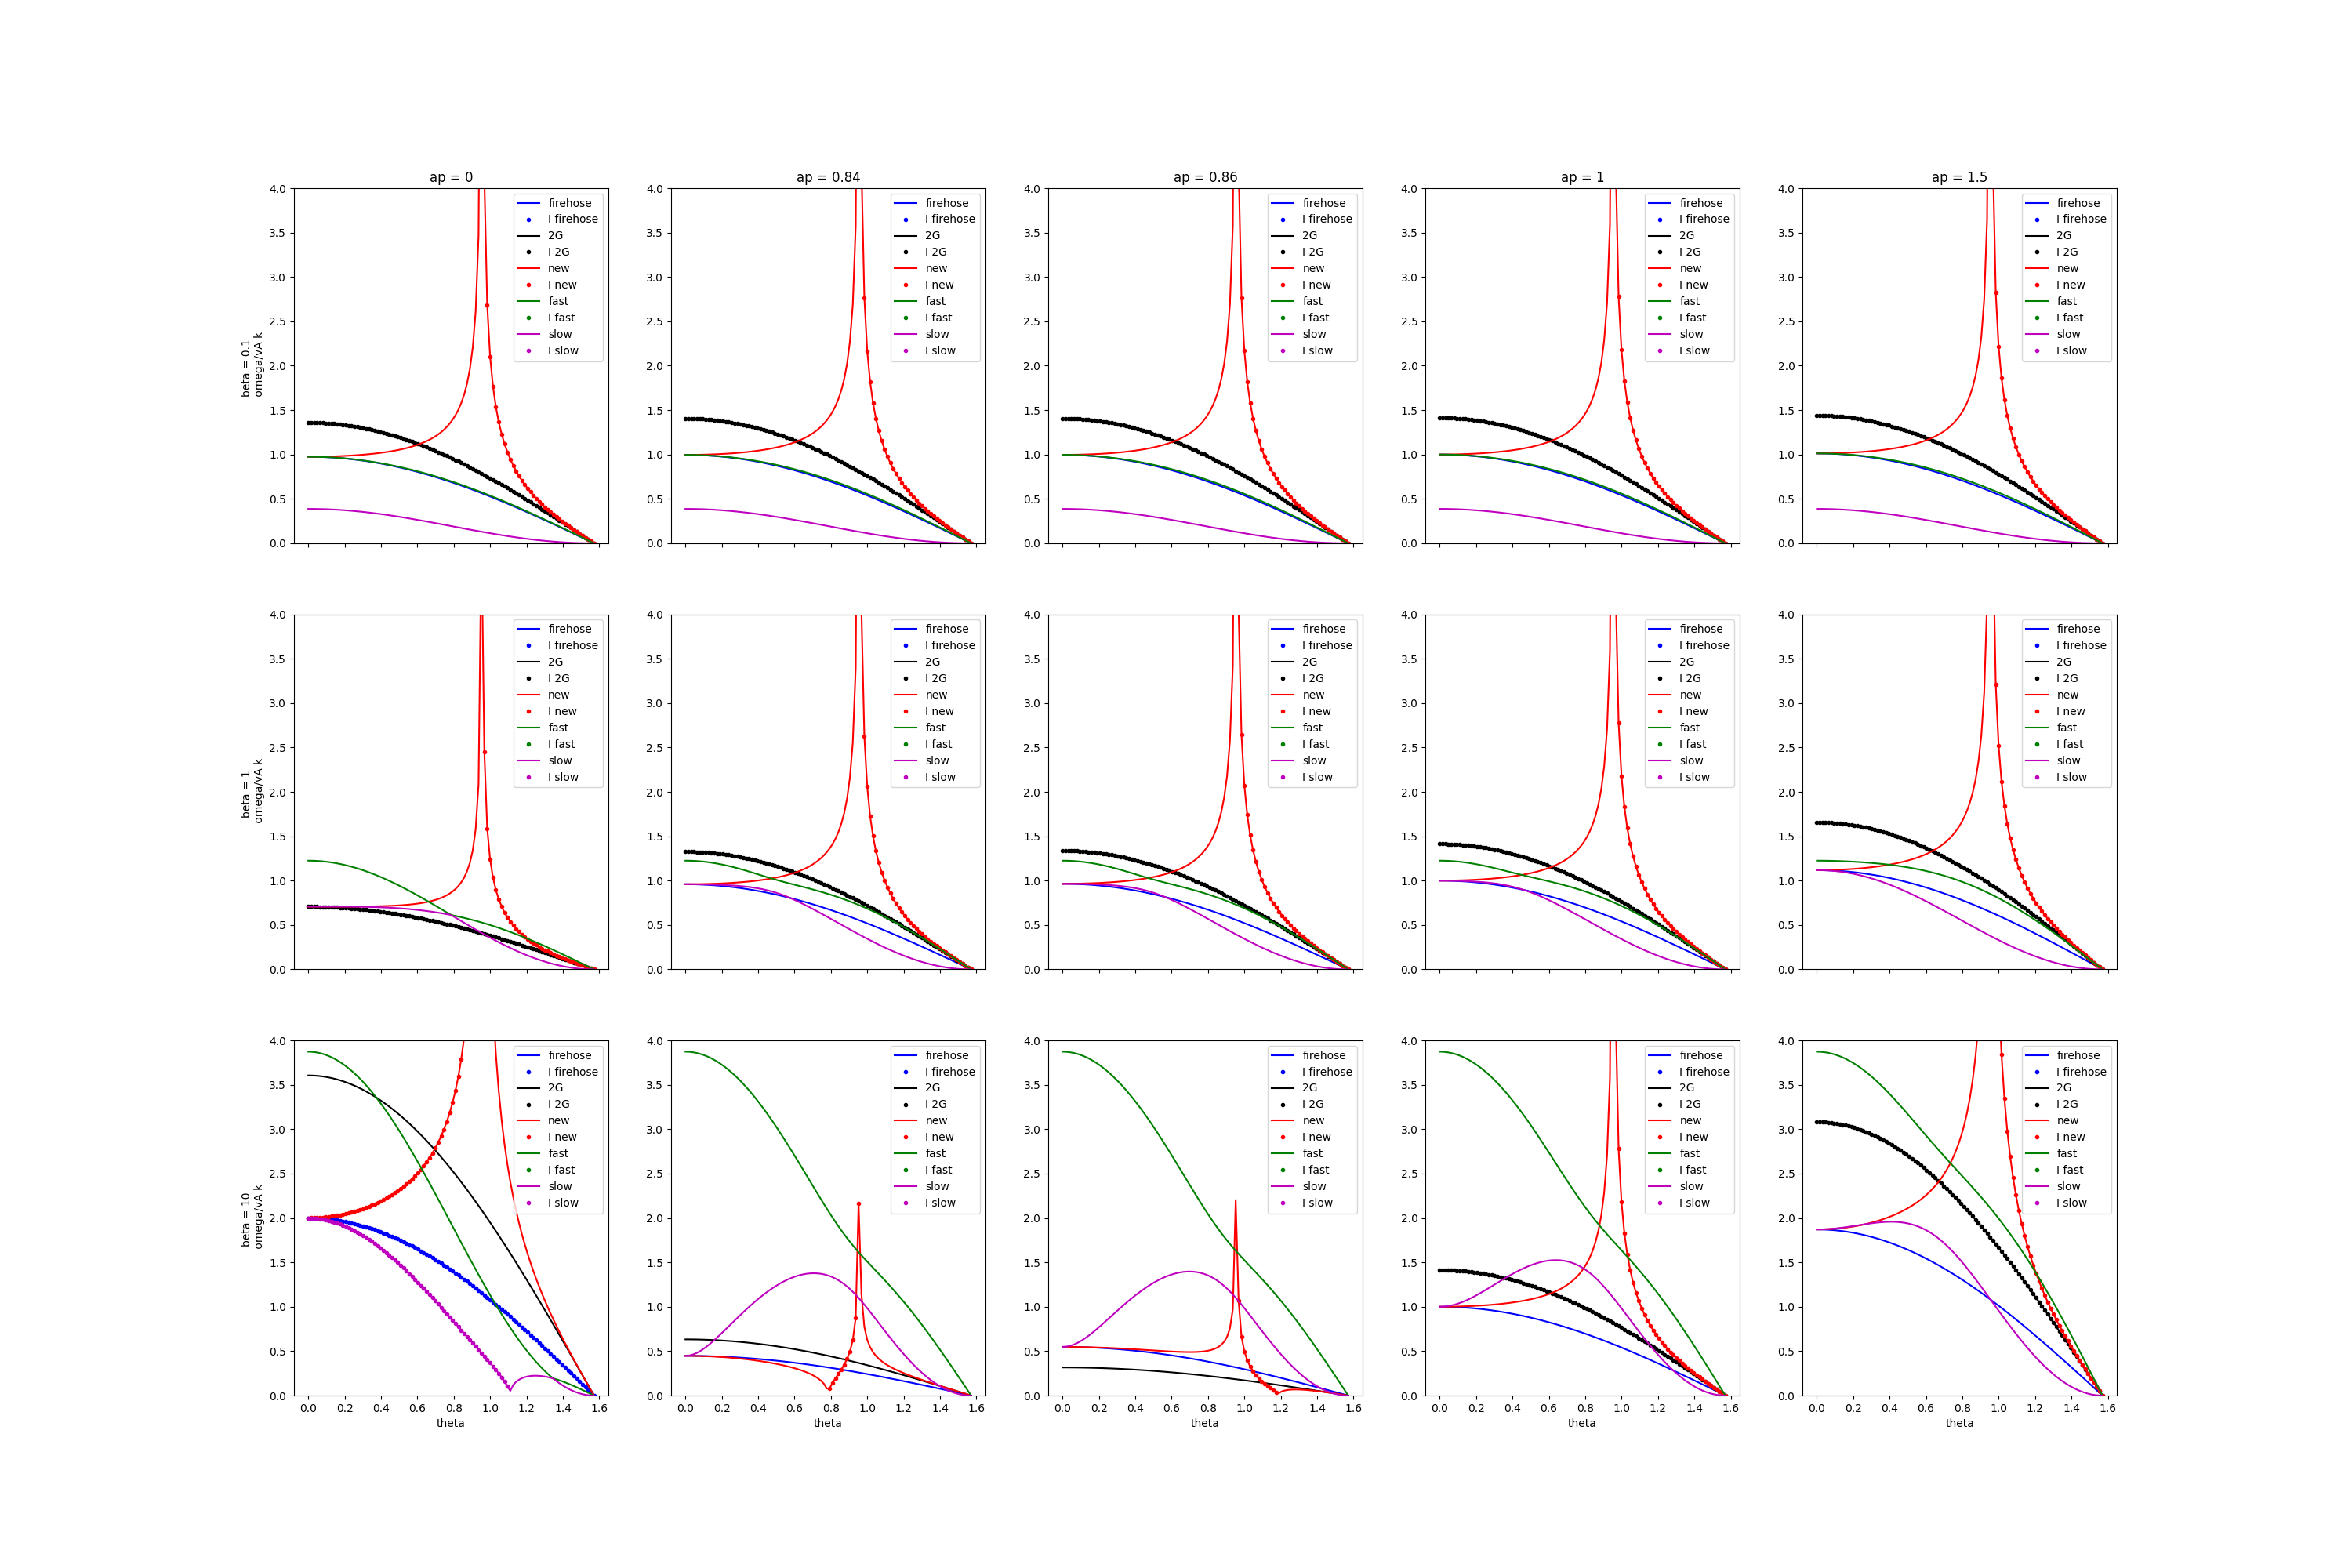

In [5]:
t=3
tab = [0,0,0,0]
k = np.linspace(0,100,500) ; tab[0]=k
theta_list = np.linspace(0,np.pi/2,100) ; tab[3]=theta_list
ap_list = [0,0.84,0.86,1,1.5]
beta_list= [0.1,1,10]
fig,axs=plt.subplots(len(beta_list),len(ap_list),figsize=(30,20),sharex=True)
for j in range(len(beta_list)):
    beta = beta_list[j] ; tab[2]=beta
    for i in range(len(ap_list)):
        ap = ap_list[i] ; tab[1]=ap
        F = np.sqrt(np.sign(inc_firehose (tab,t))*inc_firehose (tab,t))*np.cos(tab[3])
        axs[j,i].plot(tab[t],F,c='b',label='firehose')
        axs[j,i].plot(tab[t][inc_firehose (tab,t)<0],(F)[inc_firehose (tab,t)<0],'.',c='b',label='I firehose')
        G = np.sqrt(np.sign(G_funct (tab,t))*G_funct (tab,t))*np.cos(tab[3])
        axs[j,i].plot(tab[t],G,c='k',label='2G')
        axs[j,i].plot(tab[t][G_funct (tab,t)<0],(G)[G_funct (tab,t)<0],'.',c='k',label='I 2G')
        N = np.sqrt(np.sign(inc_new (tab,t))*inc_new (tab,t))*np.cos(tab[3])
        axs[j,i].plot(tab[t],N,c='r',label='new')
        axs[j,i].plot(tab[t][inc_new (tab,t)<0],(N)[inc_new (tab,t)<0],'.',c='r',label='I new')
        cF = np.sqrt(np.sign(com_fast (tab,t))*com_fast (tab,t))*np.cos(tab[3])
        axs[j,i].plot(tab[t],cF,c='g',label='fast')
        axs[j,i].plot(tab[t][com_fast (tab,t)<0],(cF)[com_fast (tab,t)<0],'.',c='g',label='I fast')
        cS = np.sqrt(np.sign(com_slow (tab,t))*com_slow (tab,t))*np.cos(tab[3])
        axs[j,i].plot(tab[t],cS,c='m',label='slow')
        axs[j,i].plot(tab[t][com_slow (tab,t)<0],(cS)[com_slow (tab,t)<0],'.',c='m',label='I slow')
        axs[0,i].set_title(f'ap = {ap_list[i]}')
        axs[-1,i].set_xlabel(f'theta')
        axs[j,i].legend()
        axs[j,i].set_ylim((0,4))
for j in range(len(beta_list)):
    axs[j,0].set_ylabel(f'beta = {beta_list[j]} \n omega/vA k')
plt.savefig('fig_omegak_theta.pdf')

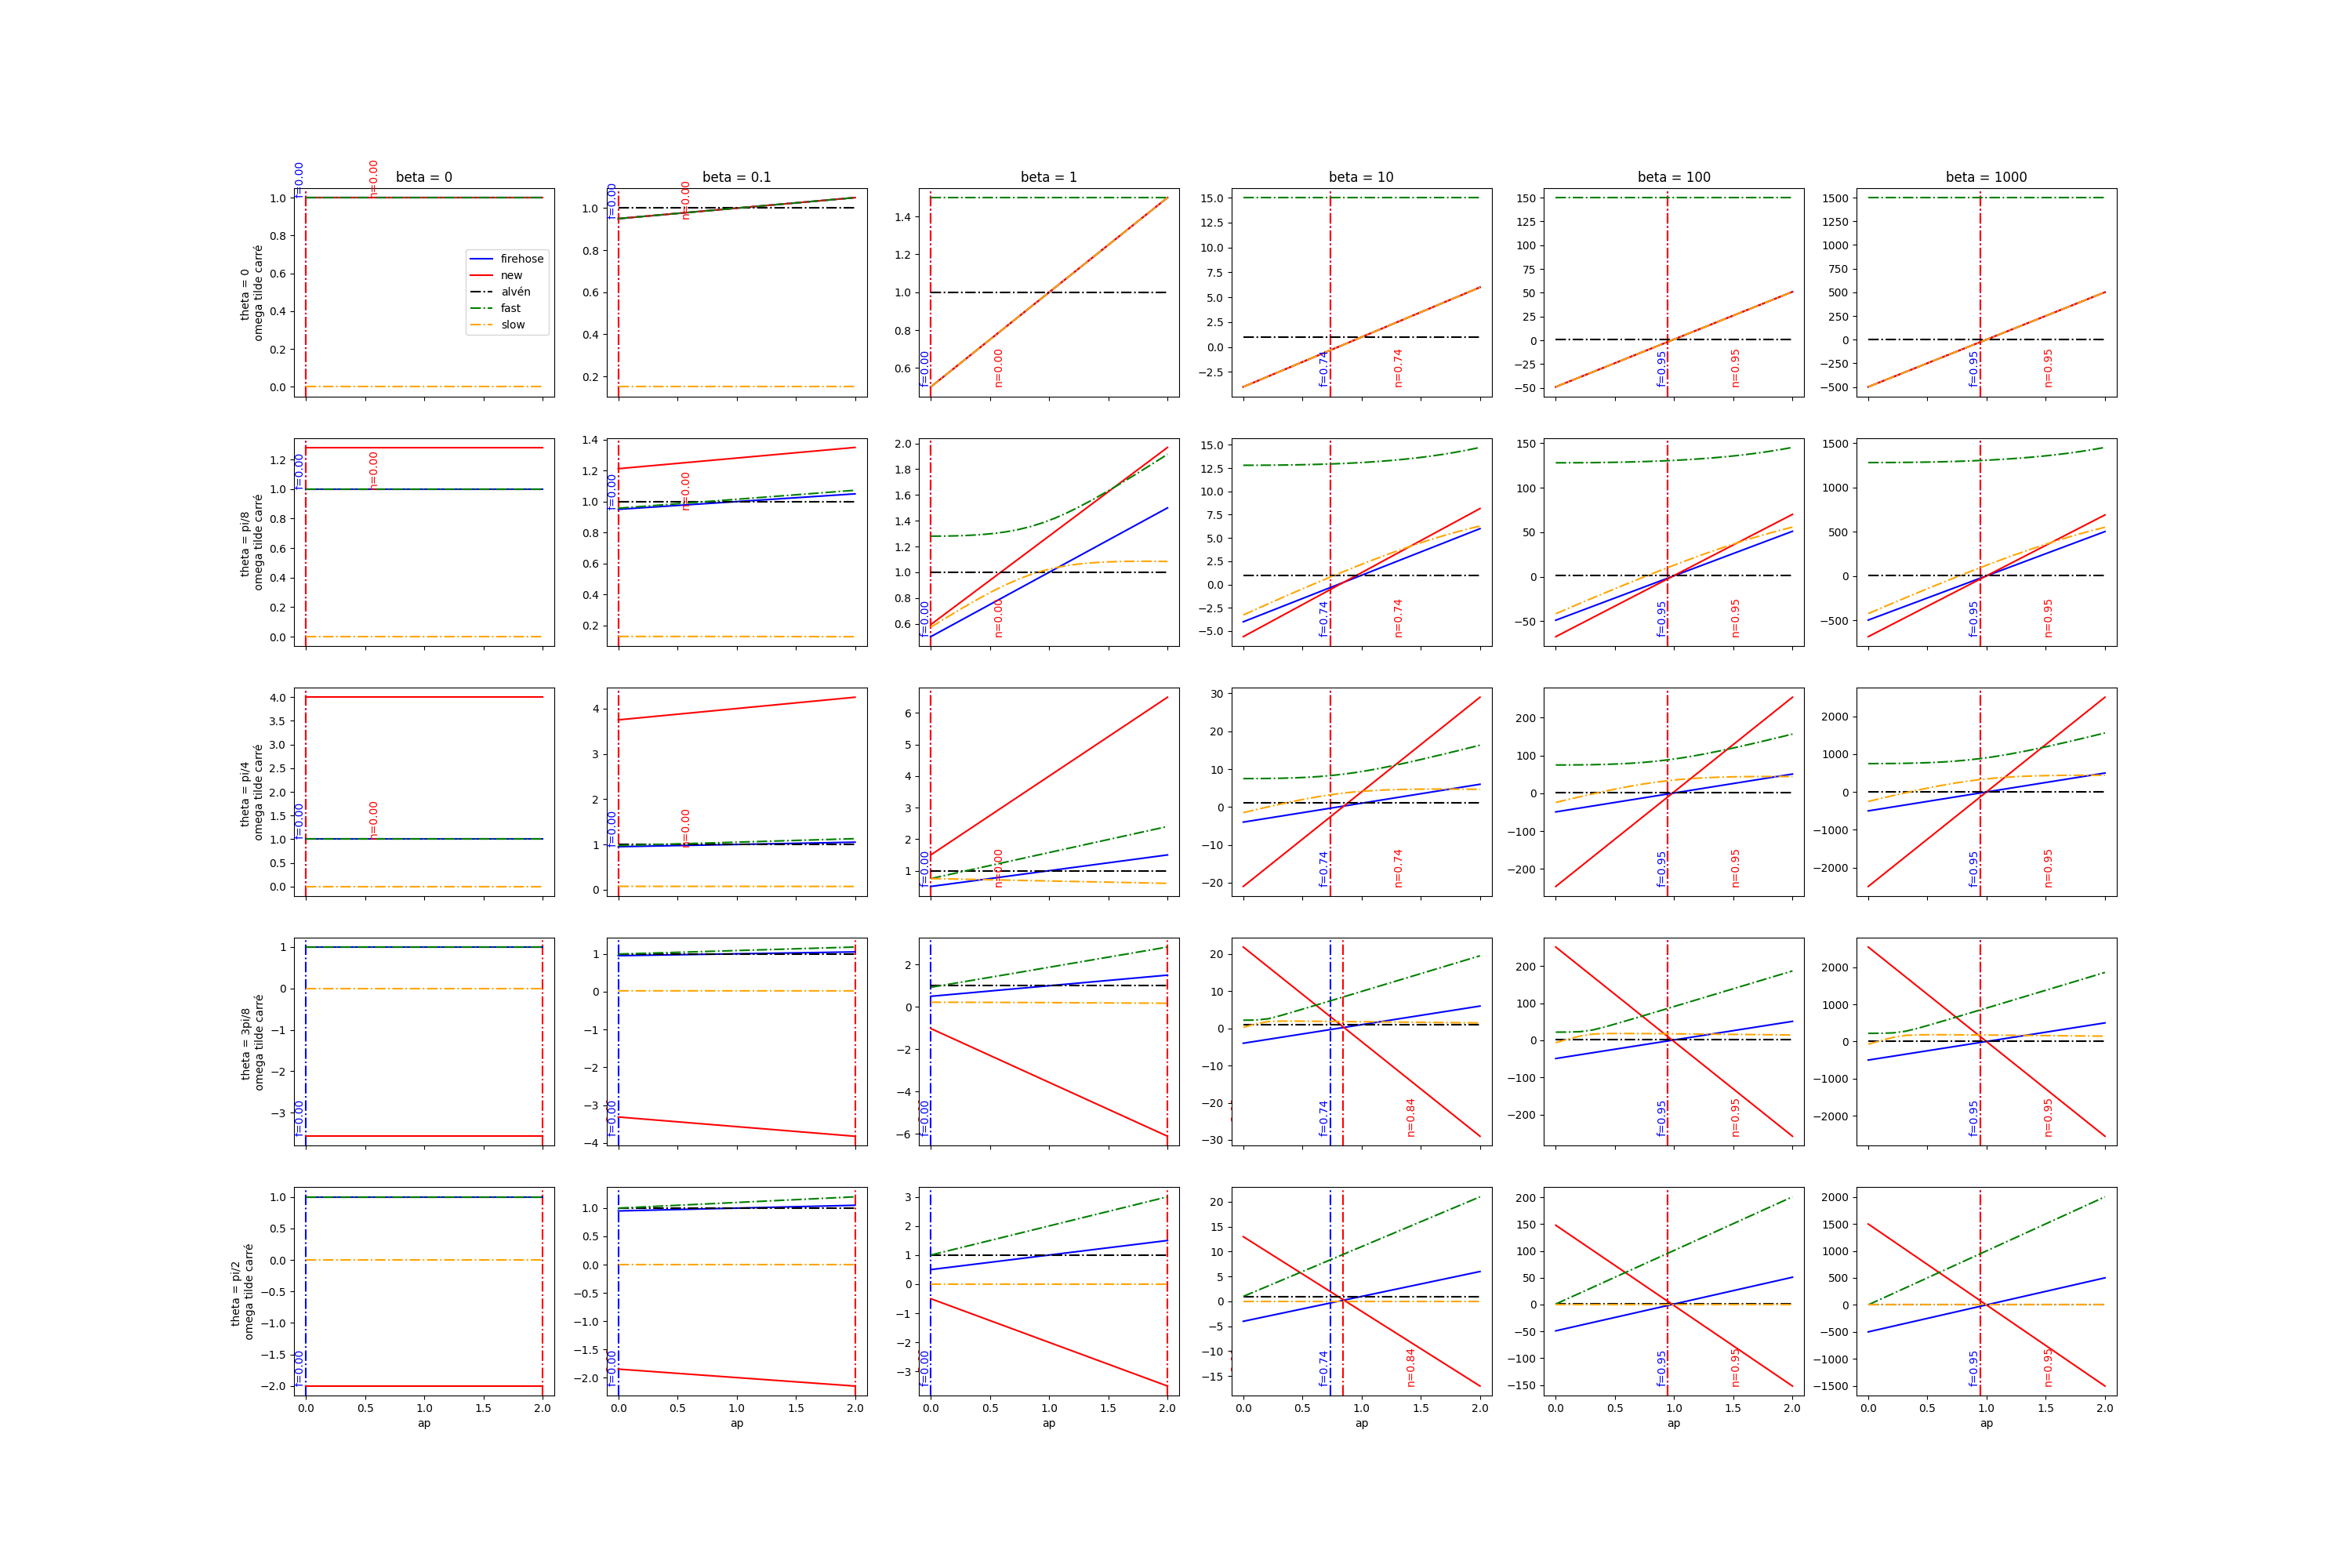

In [6]:
# study t = 1
t=1
tab = [0,0,0,0]
k = np.linspace(0,10,50) ; tab[0]=k
#ap = 10**(np.linspace(-2,1,200)) ; tab[1]=ap
ap = np.linspace(0,2,20) ; tab[1]=ap
beta_list = [0,0.1,1,10,100,1000]
theta_list = [0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2]
theta_names = ['0','pi/8','pi/4','3pi/8','pi/2']
fig,axs=plt.subplots(len(theta_list),len(beta_list),figsize=(30,20),sharex=True)
for i in range(len(beta_list)):
    beta = beta_list[i] ; tab[2]=beta
    axs[0,i].set_title(f"beta = {beta}")
    for j in range(len(theta_list)):
        theta = theta_list[j] ; tab[3]=theta
        A = inc_alven(tab,t)
        F = inc_firehose (tab,t)
        cF = com_fast(tab,t)
        cS = com_slow(tab,t)
        f = 0 
        for y in range(1,len(F)): 
            if F[y]*F[0] >= 0 : f=f+1
        if f == len(F)-1 and F[0]>=0 : f=0
        N = inc_new (tab,t)
        n = 0 
        for y in range(1,len(N)): 
            if N[y]*N[0] >= 0 : n=n+1
        if n == len(N)-1 and N[0]>=0 : n=0
        axs[j,i].axvline(x=tab[t][f],ls='-.',c='b')
        axs[j,i].text(tab[t][f] , np.min([F,N]), f'f={tab[t][f]:.2f}',color = 'b',rotation='vertical', horizontalalignment = 'right', verticalalignment = 'bottom') 
        axs[j,i].axvline(x=tab[t][n],ls='-.',c='r')
        axs[j,i].text(tab[t][n]+ tab[t][5] - tab[t][0], np.min([F,N]), f'n={tab[t][n]:.2f}',color = 'r',rotation='vertical', horizontalalignment = 'left', verticalalignment = 'bottom') 
        axs[j,i].plot(tab[t],F,c='b',label='firehose')
        axs[j,i].plot(tab[t],N,c='r',label='new')
        axs[j,i].plot(tab[t],A,'-.',c='k',label='alvén')
        axs[j,i].plot(tab[t],cF,'-.',c='g',label='fast')
        axs[j,i].plot(tab[t],cS,'-.',c='orange',label='slow')
        #axs[j,i].set_xscale('log')
    axs[len(theta_list)-1,i].set_xlabel('ap')
axs[0,0].legend()
axs[0,0].set_ylabel(f'omega tilde carré ')
for j in range(len(theta_list)):
    axs[j,0].set_ylabel(f'theta = {theta_names[j]} \n omega tilde carré ')
plt.savefig('fig_phase_ap.pdf')

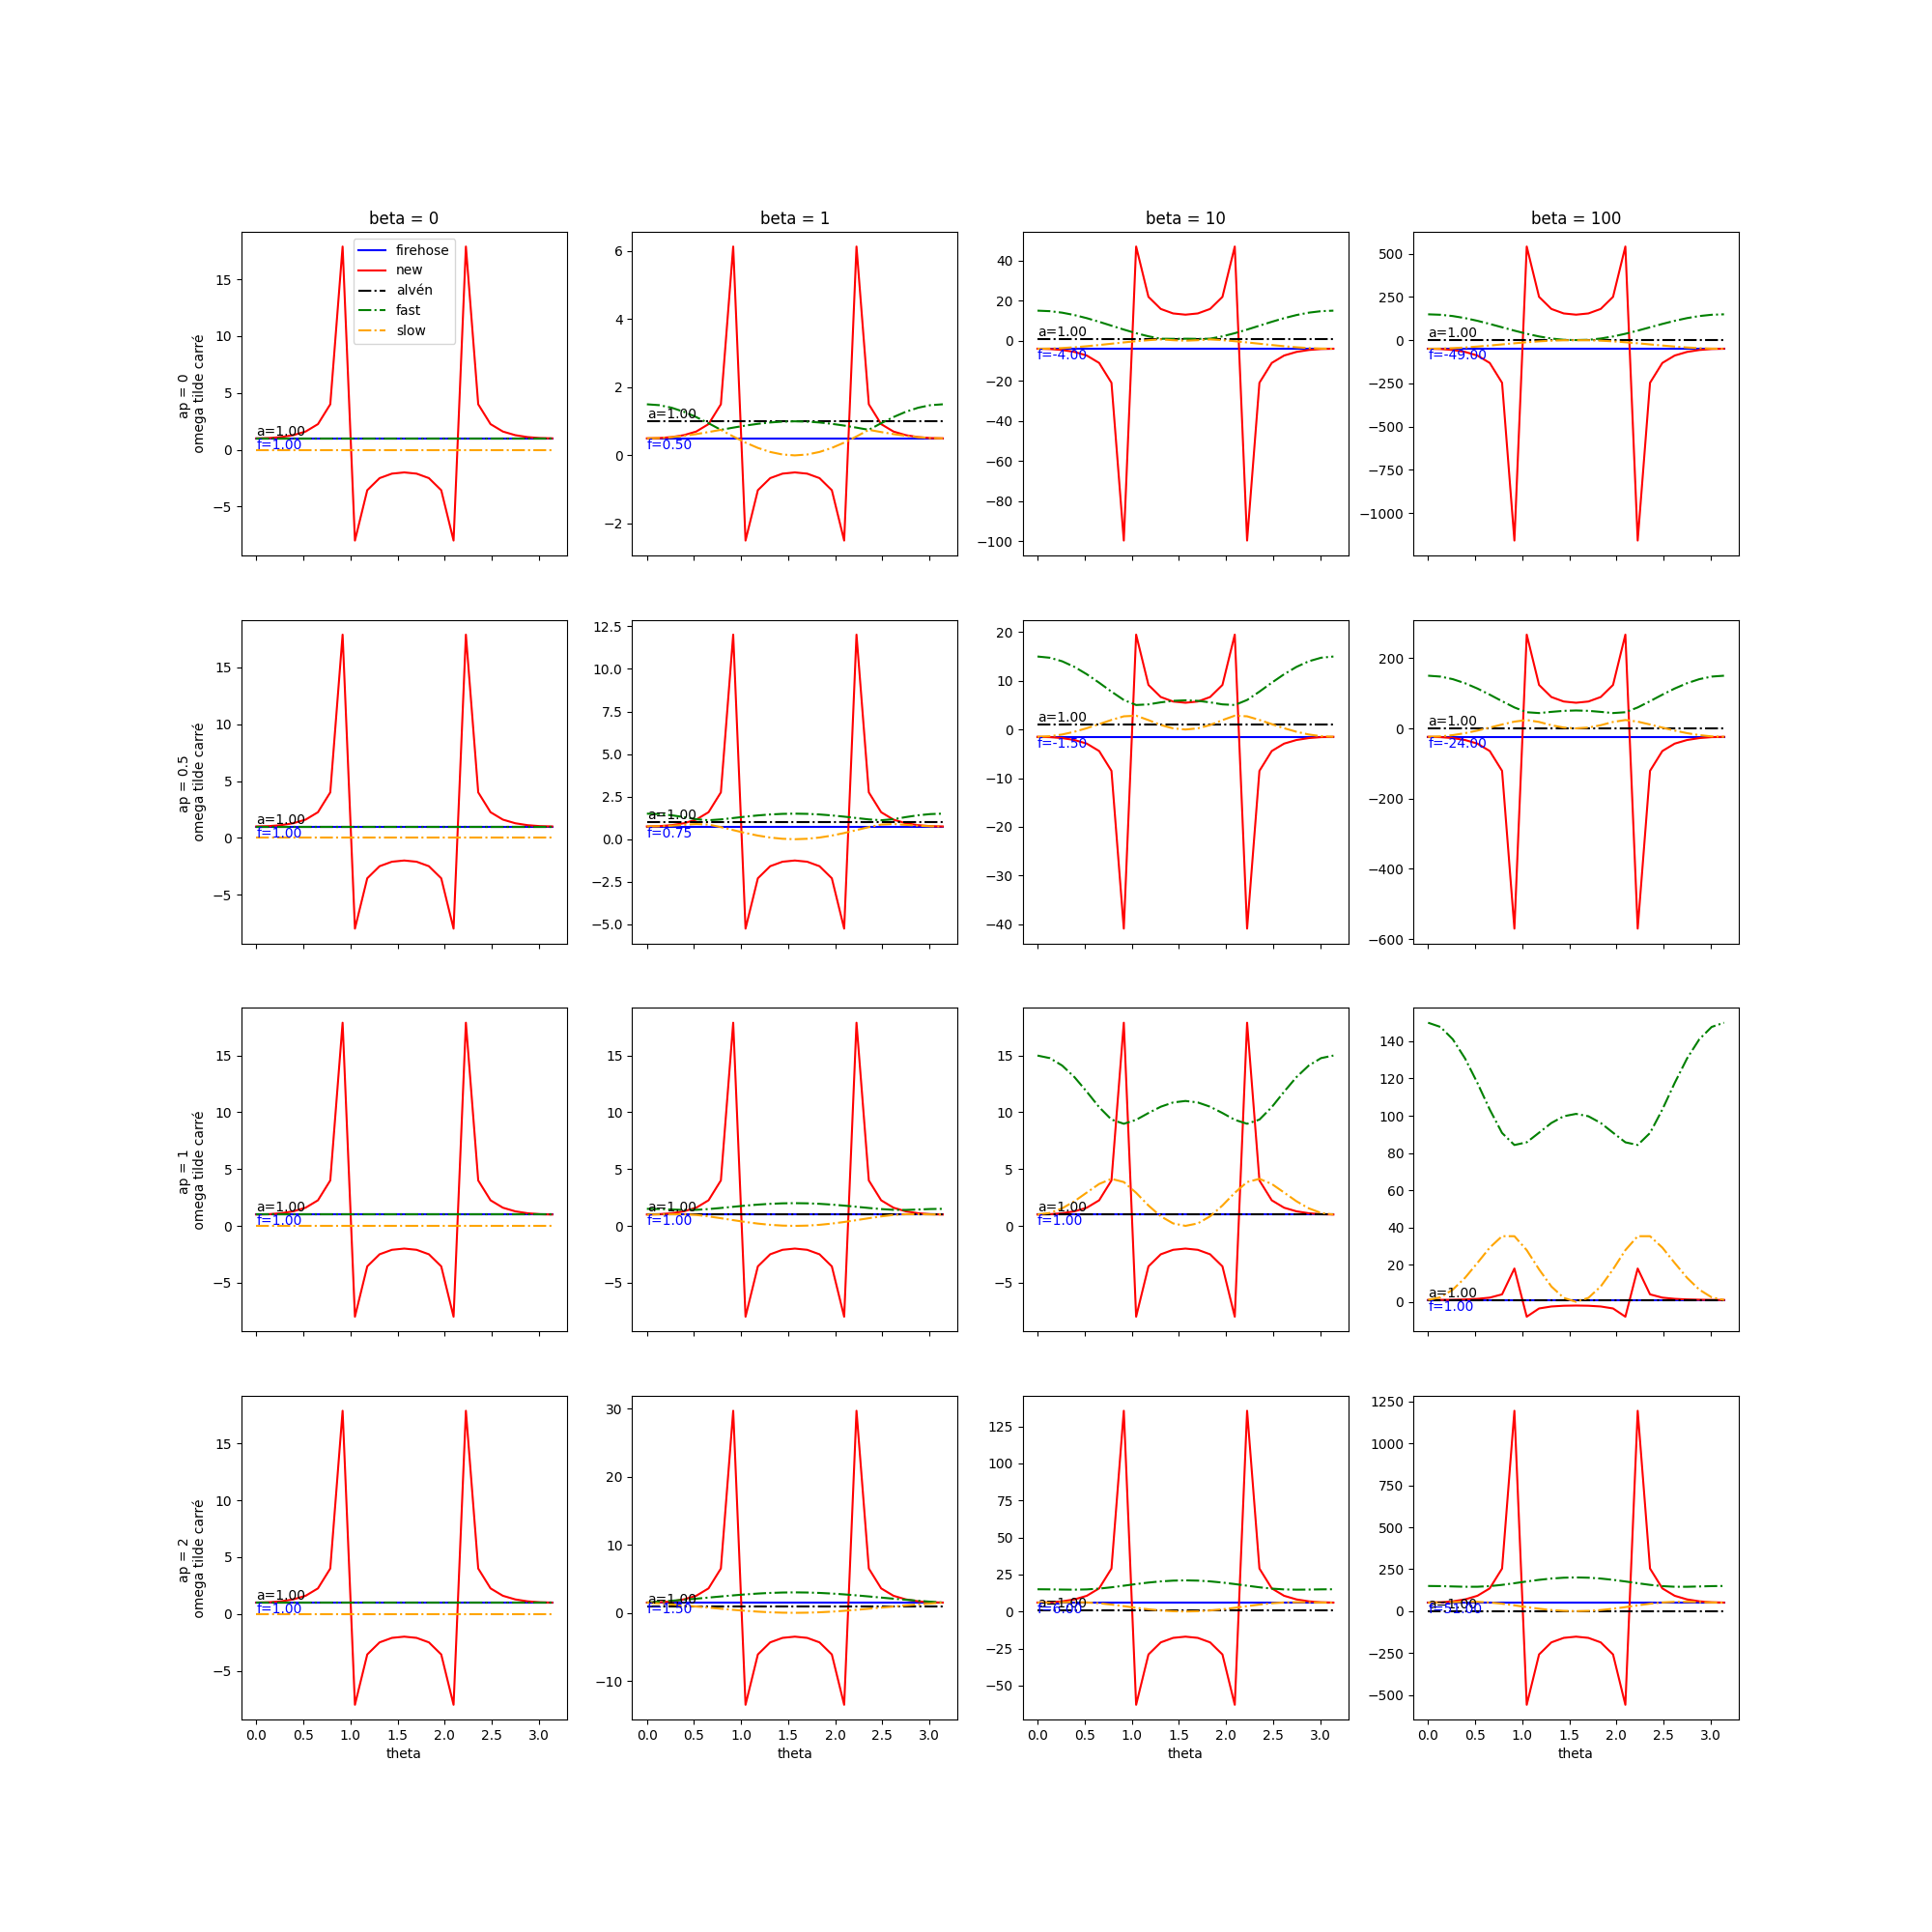

In [7]:
# study t = 3
t=3
tab = [0,0,0,0]
k = np.linspace(0,10,50) ; tab[0]=k
ap_list = [0,0.5,1,2] ; 
beta_list = [0,1,10,100]
theta = np.linspace(0,np.pi,25) ; tab[3]=theta
ap_names = ['0','0.5','1','2']
fig,axs=plt.subplots(len(ap_list),len(beta_list),figsize=(20,20),sharex=True)
for i in range(len(beta_list)):
    beta = beta_list[i] ; tab[2]=beta
    axs[0,i].set_title(f"beta = {beta}")
    for j in range(len(ap_list)):
        ap = ap_list[j] ; tab[1]=ap
        A = inc_alven(tab,t)
        cF = com_fast(tab,t)
        cS = com_slow(tab,t)
        F = inc_firehose (tab,t)
        N = inc_new (tab,t)
        axs[j,i].text(tab[t][0] , A[0], f'a={A[0]:.2f}',color = 'k', horizontalalignment = 'left', verticalalignment = 'bottom') 
        axs[j,i].plot(tab[t],F,c='b',label=f'firehose')
        axs[j,i].text(tab[t][0] , F[0], f'f={F[0]:.2f}',color = 'b', horizontalalignment = 'left', verticalalignment = 'top') 
        axs[j,i].plot(tab[t],N,c='red',label='new')
        axs[j,i].plot(tab[t],A,'-.',c='k',label='alvén')
        axs[j,i].plot(tab[t],cF,'-.',c='g',label='fast')
        axs[j,i].plot(tab[t],cS,'-.',c='orange',label='slow')
    axs[len(ap_list)-1,i].set_xlabel('theta')
axs[0,0].legend()
axs[0,0].set_ylabel(f'omega tilde carré ')
for j in range(len(ap_list)):
    axs[j,0].set_ylabel(f'ap = {ap_names[j]} \n omega tilde carré ')
plt.savefig('fig_phase_theta.pdf')

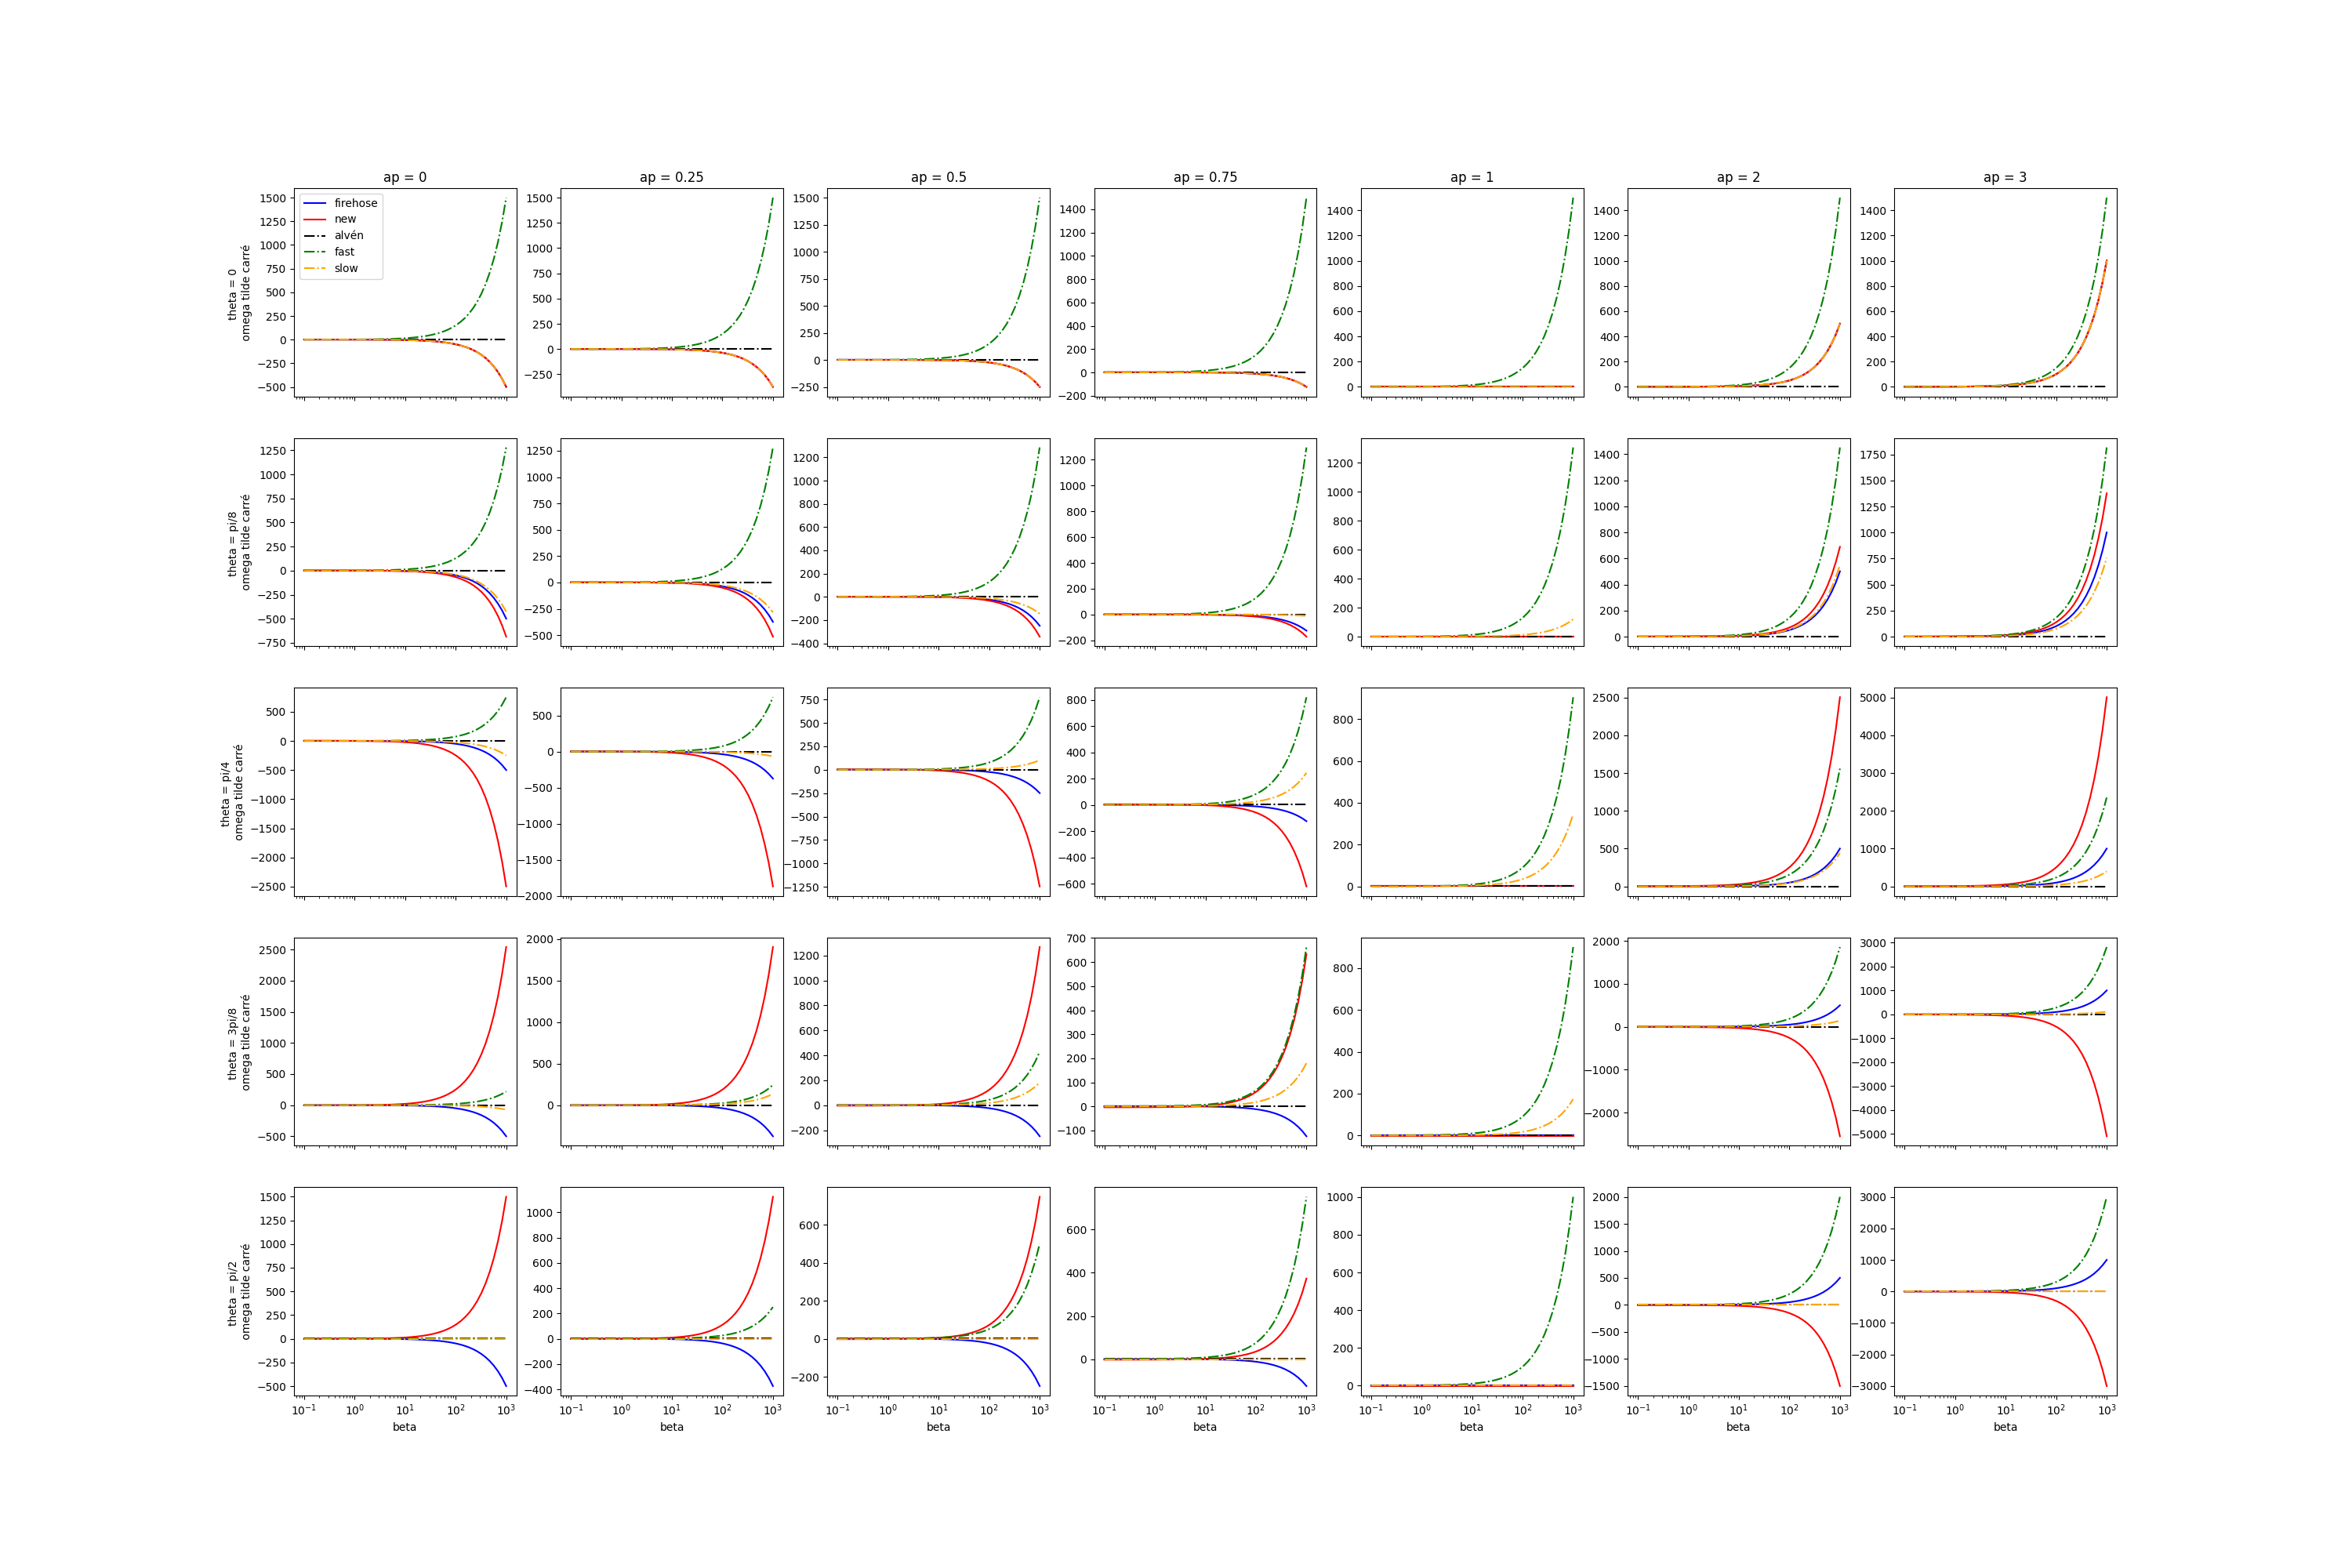

In [8]:
# study t = 2
t=2
tab = [0,0,0,0]
k = np.linspace(0,10,50) ; tab[0]=k
ap_list = [0,0.25,0.5,0.75,1,2,3] 
ap_names = ['0','0.25','0.5','0.75','1','2','3']
beta = 10**np.linspace(-1,3,50) ; tab[2]=beta
theta_list = [0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2]
theta_names = ['0','pi/8','pi/4','3pi/8','pi/2']
fig,axs=plt.subplots(len(theta_list),len(ap_list),figsize=(30,20),sharex=True)
for i in range(len(ap_list)):
    ap = ap_list[i] ; tab[1]=ap
    axs[0,i].set_title(f"ap = {ap}")
    for j in range(len(theta_list)):
        theta = theta_list[j] ; tab[3]=theta
        A = inc_alven(tab,t)
        cF = com_fast(tab,t)
        cS = com_slow(tab,t)
        F = inc_firehose (tab,t)
        N = inc_new (tab,t)
        axs[j,i].plot(tab[t],F,c='b',label=f'firehose')
        axs[j,i].plot(tab[t],N,c='red',label='new')
        axs[j,i].plot(tab[t],A,'-.',c='k',label='alvén')
        axs[j,i].plot(tab[t],cF,'-.',c='g',label='fast')
        axs[j,i].plot(tab[t],cS,'-.',c='orange',label='slow')
        axs[j,i].set_xscale('log')
    axs[len(theta_list)-1,i].set_xlabel('beta')
axs[0,0].legend()
axs[0,0].set_ylabel(f'omega tilde carré ')
for j in range(len(theta_list)):
    axs[j,0].set_ylabel(f'theta = {theta_names[j]} \n omega tilde carré ')
plt.savefig('fig_phase_beta_log.pdf')

# New mode dependences 

$\tilde{\omega} = \sqrt{ \frac{(1-\frac{\beta_{\parallel}}{2} (1-a_p)) - \frac{1}{2} \tan^2 \theta (\frac{3\beta_{\parallel}}{2} (1-a_p)-2)}{1- \frac{1}{2} \tan^2 \theta} }k \cos \theta = \sqrt{ \frac{1 + \tan^2 \theta-(1 + \frac{3}{2} \tan^2 \theta ) \frac{\beta_{\parallel}}{2} (1-a_p) }{1- \frac{1}{2} \tan^2 \theta} }k \cos \theta  = \sqrt{A - B \beta_{\parallel}(1-a_p)} k$ 

with $\tilde{\omega} = \frac{\omega}{v_{A0}}$, $A = \frac{1 + \tan^2 \theta }{1- \frac{1}{2} \tan^2 \theta}  \cos^2 \theta$ and $B = \frac{1 + \frac{3}{2} \tan^2 \theta }{2(1- \frac{1}{2} \tan^2 \theta)}  \cos^2 \theta$

* in $k$ : linear
* in $C = \beta_{\parallel}(1-a_p)$ : square root of an affine
* in $\theta$ : complicated

Stability : if $A - BC > 0$

* $B > 0$ : stable if $C<\frac{A}{B}$
* $B < 0$ : stable if $C>\frac{A}{B}$

Classic firehose case : $A = 1$ and $B = 1/2$ then stable if $C<2$

# New mode particular cases

* $\theta = 0$ => firehose
* $\beta >= 1$, $\theta \sim \pi/8$ => slow if $a_p < 2$, else fast


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt5
#%matplotlib widget
from matplotlib.widgets import Slider, Button, CheckButtons

def A(theta): 
    return (1+ np.tan(theta)*np.tan(theta))/ (1- np.tan(theta)*np.tan(theta)/2)
def B(theta): 
    return (1+ 3/2*np.tan(theta)*np.tan(theta))/2/ (1- np.tan(theta)*np.tan(theta)/2)
def C(beta,ap):
    return beta*(1-ap)
def BETA(C,ap): 
    if ap<1 and C<0 : return np.nan
    elif ap>1 and C>0 : return np.nan
    elif ap!=1 : return C/(1-ap)
    else : return 0
def new(A,B,C,k,theta):
    return np.sqrt(np.abs(A-B*C))*k*np.cos(theta)
def A0(theta,beta,ap):
    t = np.tan(theta)*np.tan(theta)
    return 3/2*beta*(t*(beta*ap-beta*ap*ap/6+1)-(beta/2*(1-ap)-1))
def A2(theta,beta,ap):
    t = np.tan(theta)*np.tan(theta)
    return (ap*beta+1)*t+(beta+beta*ap/2+1)
def fast (A2,A0,k,theta):
    return np.sqrt(A2/2+np.sqrt(A2*A2-4*A0)/2)*k*np.cos(theta)
def slow (A2,A0,k,theta):
    return np.sqrt(np.abs(A2/2-np.sqrt(A2*A2-4*A0)/2))*k*np.cos(theta)

In [2]:
k=np.linspace(0,10,1000)
init_ap = 0
init_beta = 0
init_theta = 0
init_a = A(init_theta)
init_b = B(init_theta)
init_c = C(init_beta,init_ap)
init_a0 = A0(init_theta,init_beta,init_ap)
init_a2 = A2(init_theta,init_beta,init_ap)
x = k
xlab = 'k'
ylab = 'omega/vA' #'omega/(vA.k)'
line = []
leg = []
text = ['stable','instable','beta<0','beta>0']
color = []

# Init figure
fig, ax = plt.subplots()
ax.set_title('Parametrical study in function of k')
line_fast, = plt.plot(x, fast(init_a2, init_a0, k,init_theta),'g', lw=2,label='fast')
color.append('g')
line.append(line_fast)
leg.append('stable')
    
line_slow, = plt.plot(x, slow(init_a2, init_a0, k,init_theta),'m', lw=2,label='slow')
color.append('m')
line.append(line_slow)
leg.append('stable')
if init_a0 < 0: 
    line[1].set_linestyle('-.')
    leg[1] = 'instable'

line_firehose, = plt.plot(x, new(1,1/2, init_c, k,init_theta),'b', lw=2,label='firehose')
color.append('b')
line.append(line_firehose)
leg.append('stable')
if init_c > 2: 
    line[2].set_linestyle('-.')
    leg[2] = 'instable'
    
line_new, = plt.plot(x, new(init_a,init_b, init_c, k,init_theta),'r', lw=2,label='new')
color.append('r')
line.append(line_new)
leg.append('stable')
if init_a-init_b*init_c < 0: 
    line[3].set_linestyle('-.')
    leg[3] = 'instable'
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
ax.set_ylim(0,np.max( new(1,1/2, init_c, k,0))+1)
#legend = ax.legend(line,leg,ncol=len(line))

# Sliders
plt.subplots_adjust(left=0.50)

axtheta = plt.axes([0.05, 0.25, 0.0225, 0.63])
theta_slider = Slider(
    ax=axtheta,
    label="Theta",
    valmin=0,
    valmax=np.pi/2,
    valinit=init_theta,
    orientation="vertical", 
    **{'facecolor':'lightgrey'})
theta_slider.hline.set_ydata(100)
theta_slider.hline1 = axtheta.axhline(np.arctan(np.sqrt(2)), 0, 1, color='red', lw=1)
stncrit_text0 = plt.text(0.43,0.83,text[0],color='red',rotation='vertical',verticalalignment='top') # transform=ax.transAxes
stncrit_text1 = plt.text(0.43,1.02,text[1],color='red',rotation='vertical',verticalalignment='bottom')
def update_stncrit(a,b,c):
    if c > a/b : 
        stncrit_text0.set_text(text[1])
        stncrit_text1.set_text(text[0])
    else:
        stncrit_text0.set_text(text[0])
        stncrit_text1.set_text(text[1])
        
axc = plt.axes([0.15, 0.25, 0.0225, 0.63])
c_slider = Slider(
    ax=axc,
    label="beta(1-ap)",
    valmin=-10,
    valmax=10,
    valinit=init_c,
    orientation="vertical",
    **{'facecolor':'lightgrey'})
c_slider.hline.set_ydata(100)
c_slider.hline1 = axc.axhline(2, 0, 1, color='blue', lw=1)
sfcrit_text0 = plt.text(0.43,0.5,text[0],color='blue',rotation='vertical',verticalalignment='top')
sfcrit_text1 = plt.text(0.43,3,text[1],color='blue',rotation='vertical',verticalalignment='bottom')
c_slider.hline2 = axc.axhline(init_a/init_b, 0, 1, color='red', lw=1)
scncrit_text0 =plt.text(0.52,0.5,text[0],color='red',rotation='vertical',verticalalignment='top')
scncrit_text1= plt.text(0.52,3,text[1],color='red',rotation='vertical',verticalalignment='bottom')
def update_scncrit(theta):
    if theta < np.arctan(np.sqrt(2)) : 
        scncrit_text0.set_text(text[0])
        scncrit_text1.set_text(text[1])
    else : 
        scncrit_text0.set_text(text[1])
        scncrit_text1.set_text(text[0])
    
axap = plt.axes([0.25, 0.25, 0.0225, 0.63])
ap_slider = Slider(
    ax=axap,
    label="ap",
    valmin=0,
    valmax=2,
    valinit=init_ap,
    orientation="vertical",
    **{'facecolor':'lightgrey'})
ap_slider.hline.set_ydata(100)
ap_slider.hline1 = axap.axhline(1, 0, 1, color='black', lw=1)
apcrit_text0=plt.text(0.52,0.9,text[2],color='white',rotation='vertical',verticalalignment='top')
apcrit_text1=plt.text(0.52,1.1,text[3],color='white',rotation='vertical',verticalalignment='bottom')
beta_text=plt.text(0.7,2.055,'beta',color='black',horizontalalignment='center')
beta_text_val=plt.text(0.7,1.92,str(init_beta),color='black',horizontalalignment='center')
def update_apcrit(c): 
    if c > 0 : 
        apcrit_text0.set_color('black')
        apcrit_text0.set_text(text[3])
        apcrit_text1.set_color('black')
        apcrit_text1.set_text(text[2])
    elif c < 0 :  
        apcrit_text0.set_color('black')
        apcrit_text0.set_text(text[2])
        apcrit_text1.set_color('black')
        apcrit_text1.set_text(text[3])
    else : 
        apcrit_text0.set_color('white')
        apcrit_text1.set_color('white')

def update_theta(val):
    c = c_slider.val
    ap = ap_slider.val
    theta = theta_slider.val
    a = A(theta)
    b = B(theta)
    beta = BETA(c,ap)
    a0 = A0(theta,beta,ap)
    a2 = A2(theta,beta,ap)
    c_slider.hline2.set_ydata(a/b)
    update_scncrit(theta)
    line[2].set_ydata(new(1,1/2,c,k,theta))
    line[3].set_ydata(new(a,b,c,k,theta))
    if a-b*c>0 : 
        line[3].set_linestyle('-')
        leg[3] = 'stable'
    else : 
        line[3].set_linestyle('-.')
        leg[3] = 'instable'
    line[0].set_ydata(fast(a2,a0,k,theta)) #fast
    line[1].set_ydata(slow(a2,a0,k,theta)) #slow
    if a0>0 : 
        line[1].set_linestyle('-')
        leg[1] = 'stable'
    else : 
        line[1].set_linestyle('-.')
        leg[1] = 'instable'
    #legend = ax.legend(line, leg)
    fig.canvas.draw_idle()
theta_slider.on_changed(update_theta)

def update_c(val):
    c = c_slider.val
    theta = theta_slider.val
    a = A(theta)
    b = B(theta)
    ap = ap_slider.val
    beta = BETA(c,ap)
    a0 = A0(theta,beta,ap)
    a2 = A2(theta,beta,ap)
    beta_text_val.set_text('{:.2}'.format(beta))
    update_apcrit(c)
    update_stncrit(a,b,c)
    line[2].set_ydata(new(1,1/2,c,k,theta))
    if c < 2 : 
        line[2].set_linestyle('-')
        leg[2] = 'stable'
    else : 
        line[2].set_linestyle('-.')
        leg[2] = 'instable'
    line[3].set_ydata(new(a,b,c,k,theta))
    if a-b*c>0 : 
        line[3].set_linestyle('-')
        leg[3] = 'stable'
    else : 
        line[3].set_linestyle('-.')
        leg[3] = 'instable'
    line[0].set_ydata(fast(a2,a0,k,theta)) #fast
    line[1].set_ydata(slow(a2,a0,k,theta)) #slow
    if a0 > 0 : 
        line[1].set_linestyle('-')
        leg[1] = 'stable'
    else : 
        line[1].set_linestyle('-.')
        leg[1] = 'instable'
    #legend = ax.legend(line, leg)
    fig.canvas.draw_idle()
c_slider.on_changed(update_c)

def update_ap(val):
    theta = theta_slider.val
    c = c_slider.val
    ap = ap_slider.val
    beta = BETA(c,ap)
    a0 = A0(theta,beta,ap)
    a2 = A2(theta,beta,ap)
    beta_text_val.set_text('{:.2}'.format(beta))
    line[0].set_ydata(fast(a2,a0,k,theta)) #fast
    line[1].set_ydata(slow(a2,a0,k,theta)) #slow
    if a0 > 0 : 
        line[1].set_linestyle('-')
        leg[1] = 'stable'
    else : 
        line[1].set_linestyle('-.')
        leg[1] = 'instable'
    #legend = ax.legend(line, leg)
    fig.canvas.draw_idle()
ap_slider.on_changed(update_ap)

# CheckButtons Model incompressible
axl1 = plt.axes([0.04, 0.1, 0.13, 0.1])
labels1 = [str(l.get_label()) for l in line[:2]]
visibility1 = [l.get_visible() for l in line[:2]]
check1 = CheckButtons(axl1, labels1, visibility1)
for col in range(len(color[:2])):
    check1.labels[col].set_color(color[col])
def func1(label):
    index = labels1.index(label)
    line[index].set_visible(not line[index].get_visible())
    plt.draw()
check1.on_clicked(func1)

# CheckButtons CGL 
axl2 = plt.axes([0.2, 0.1, 0.13, 0.1])
labels2 = [str(l.get_label()) for l in line[2:]]
visibility2 = [l.get_visible() for l in line[2:]]
check2 = CheckButtons(axl2, labels2, visibility2)
for col in range(len(color[2:])):
    check2.labels[col].set_color(color[col+2])
def func2(label):
    index = labels2.index(label)
    line[index+2].set_visible(not line[index+2].get_visible())
    plt.draw()
check2.on_clicked(func2)

# Reset Button
resetax = plt.axes([0.04, 0.025, 0.13, 0.04])
reset_button = Button(resetax, 'Reset', hovercolor='0.975')
def reset(event):
    theta_slider.reset()
    c_slider.reset()
reset_button.on_clicked(reset)

plt.show()

In [3]:
k=1
#init_ap = 0
init_beta = 0.1
init_theta = 0.25
init_a = A(init_theta)
init_b = B(init_theta)
init_c = np.linspace(-100,100,1000)
init_ap = 1 - init_c / init_beta
init_a0 = A0(init_theta,init_beta,init_ap)
init_a2 = A2(init_theta,init_beta,init_ap)
x = init_c
xlab = 'beta(1-ap)'
ylab = 'omega/(vA.k)'
line = []
leg = []
text = ['stable','instable','beta<0','beta>0']
color = []

# Init figure
fig, ax = plt.subplots()
ax.set_title('Parametrical study in function of beta(1-ap)')
line_fast, = plt.plot(x, fast(init_a2, init_a0, k,init_theta),'g', lw=2,label='fast')
color.append('g')
line.append([line_fast])
leg.append('stable')

test_slow = init_a0<0
rel_disp_slow = slow(init_a2, init_a0, k,init_theta)
line_slow, = plt.plot(x, np.ma.masked_where(test_slow, rel_disp_slow),'m', lw=2,label='slow')
line_slowI, = plt.plot(x, np.ma.masked_where(np.invert(test_slow), rel_disp_slow),'-.m', lw=2,label='slow')
color.append('m')
line.append([line_slow,line_slowI])
leg.append('stable')

test_firehose = 1-init_c/2<0
rel_disp_firehose = new(1,1/2, init_c, k,init_theta)
line_firehose, = plt.plot(x, np.ma.masked_where(test_firehose, rel_disp_firehose),'b', lw=2,label='firehose')
line_firehoseI, = plt.plot(x, np.ma.masked_where(np.invert(test_firehose), rel_disp_firehose),'-.b', lw=2,label='firehose')
color.append('b')
line.append([line_firehose,line_firehoseI])
leg.append('stable')

test_new = init_a-init_c*init_b<0
rel_disp_new = new(init_a,init_b, init_c, k,init_theta)
line_new, = plt.plot(x, np.ma.masked_where(test_new, rel_disp_new),'r',lw=2,label='new')
line_newI, = plt.plot(x, np.ma.masked_where(np.invert(test_new), rel_disp_new),'-.r',lw=2,label='new')
color.append('r')
line.append([line_new,line_newI])
leg.append('stable')

ax.set_xlabel(xlab)
ax.set_xlim(np.min(init_c),np.max(init_c))


ax2 = ax.twiny()
lineaxe2, = plt.plot(init_ap, new(init_a,init_b, init_c, k,init_theta),'r',lw=2,label='new')
lineaxe2.set_visible(False)
ax2.set_xlim(np.max(init_ap),np.min(init_ap))
ax2.set_xlabel('ap')
irrelevant_zone = ax2.axvspan(0,ax2.get_xlim()[1],ax2.get_ylim()[0], ax2.get_ylim()[1],color='black',alpha=0.5)

ax.set_ylabel(ylab)
ax.set_ylim(0,np.max( new(1,1/2, init_c, k,0))+1)
#legend = ax.legend(line,leg,ncol=len(line))

# Sliders
plt.subplots_adjust(left=0.40)

axtheta = plt.axes([0.05, 0.25, 0.0225, 0.63])
theta_slider = Slider(
    ax=axtheta,
    label="Theta",
    valmin=0,
    valmax=np.pi/2,
    valinit=init_theta,
    orientation="vertical", 
    **{'facecolor':'lightgrey'})
theta_slider.hline.set_ydata(100)
theta_slider.hline1 = axtheta.axhline(np.arctan(np.sqrt(2)), 0, 1, color='red', lw=1)
        
axbeta = plt.axes([0.15, 0.25, 0.0225, 0.63])
beta_slider = Slider(
    ax=axbeta,
    label="beta",
    valmin=0.0001,
    valmax=10,
    valinit=init_beta,
    orientation="vertical",
    **{'facecolor':'lightgrey'})
beta_slider.hline.set_ydata(100)

def update_theta(val):
    c = init_c
    beta = beta_slider.val
    ap = 1-c/beta
    theta = theta_slider.val
    a = A(theta)
    b = B(theta)
    a0 = A0(theta,beta,ap)
    a2 = A2(theta,beta,ap)
    test_firehose = 1-c/2<0
    rel_disp_firehose = new(1,1/2,c,k,theta)
    line[2][0].set_ydata(np.ma.masked_where(test_firehose, rel_disp_firehose))
    line[2][1].set_ydata(np.ma.masked_where(np.invert(test_firehose), rel_disp_firehose))
    test_new = a-c*b<0
    rel_disp_new = new(a,b,c,k,theta)
    line[3][0].set_ydata(np.ma.masked_where(test_new, rel_disp_new))
    line[3][1].set_ydata(np.ma.masked_where(np.invert(test_new), rel_disp_new))
    line[0][0].set_ydata(fast(a2,a0,k,theta))
    test_slow = a0<0
    rel_disp_slow = slow(a2,a0,k,theta)
    line[1][0].set_ydata(np.ma.masked_where(test_slow, rel_disp_slow))
    line[1][1].set_ydata(np.ma.masked_where(np.invert(test_slow), rel_disp_slow))
    #legend = ax.legend(line, leg)
    fig.canvas.draw_idle()
theta_slider.on_changed(update_theta)


def update_beta(val):
    c = init_c
    beta = beta_slider.val
    ap = 1-c/beta
    theta = theta_slider.val
    a = A(theta)
    b = B(theta)
    a0 = A0(theta,beta,ap)
    a2 = A2(theta,beta,ap)
    test_firehose = 1-c/2<0
    rel_disp_firehose = new(1,1/2,c,k,theta)
    line[2][0].set_ydata(np.ma.masked_where(test_firehose, rel_disp_firehose))
    line[2][1].set_ydata(np.ma.masked_where(np.invert(test_firehose), rel_disp_firehose))
    test_new = a-c*b<0
    rel_disp_new = new(a,b,c,k,theta)
    line[3][0].set_ydata(np.ma.masked_where(test_new, rel_disp_new))
    line[3][1].set_ydata(np.ma.masked_where(np.invert(test_new), rel_disp_new))
    line[0][0].set_ydata(fast(a2,a0,k,theta))
    test_slow = a0<0
    rel_disp_slow = slow(a2,a0,k,theta)
    line[1][0].set_ydata(np.ma.masked_where(test_slow, rel_disp_slow))
    line[1][1].set_ydata(np.ma.masked_where(np.invert(test_slow), rel_disp_slow))
    lineaxe2.set_data(ap, new(a,b, c, k,theta))
    ax2.set_xlim(np.max(ap),np.min(ap))
    irrelevant_zone.set_xy([[0,ax2.get_xlim()[0]],[0,ax2.get_xlim()[1]],[ax2.get_xlim()[1],ax2.get_xlim()[1]],[ax2.get_xlim()[1],ax2.get_xlim()[0]]])
    #legend = ax.legend(line, leg)
    fig.canvas.draw_idle()
beta_slider.on_changed(update_beta)

# CheckButtons Model incompressible
axl1 = plt.axes([0.04, 0.1, 0.13, 0.1])
labels1 = [str(l[0].get_label()) for l in line[:2]]
visibility1 = [l[0].get_visible() for l in line[:2]]
check1 = CheckButtons(axl1, labels1, visibility1)
for col in range(len(color[:2])):
    check1.labels[col].set_color(color[col])
def func1(label):
    index = labels1.index(label)
    for sub in range(len(line[index])):
        line[index][sub].set_visible(not line[index][sub].get_visible())
    plt.draw()
check1.on_clicked(func1)

# CheckButtons CGL 
axl2 = plt.axes([0.2, 0.1, 0.13, 0.1])
labels2 = [str(l[0].get_label()) for l in line[2:]]
visibility2 = [l[0].get_visible() for l in line[2:]]
check2 = CheckButtons(axl2, labels2, visibility2)
for col in range(len(color[2:])):
    check2.labels[col].set_color(color[col+2])
def func2(label):
    index = labels2.index(label)
    for sub in range(len(line[index+2])):
        line[index+2][sub].set_visible(not line[index+2][sub].get_visible())
    plt.draw()
check2.on_clicked(func2)

# Reset Button
resetax = plt.axes([0.04, 0.025, 0.13, 0.04])
reset_button = Button(resetax, 'Reset', hovercolor='0.975')
def reset(event):
    theta_slider.reset()
    c_slider.reset()
reset_button.on_clicked(reset)

plt.show()

Traceback (most recent call last):
  File "/home/simon/venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/home/simon/venv/lib/python3.10/site-packages/matplotlib/widgets.py", line 585, in <lambda>
    return self._observers.connect('changed', lambda val: func(val))
  File "/tmp/ipykernel_6242/3905756064.py", line 175, in update_c
    line[2].set_ydata(new(1,1/2,c,k,theta))
AttributeError: 'list' object has no attribute 'set_ydata'
Traceback (most recent call last):
  File "/home/simon/venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/home/simon/venv/lib/python3.10/site-packages/matplotlib/widgets.py", line 585, in <lambda>
    return self._observers.connect('changed', lambda val: func(val))
  File "/tmp/ipykernel_6242/3905756064.py", line 175, in update_c
    line[2].set_ydata(new(1,1/2,c,k,theta))
AttributeError: 'list' object has no attribute 's

# New mode criteria

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt5
#%matplotlib widget
from matplotlib.widgets import Slider, Button, CheckButtons

def A(theta): 
    return (1+ np.tan(theta)*np.tan(theta))/ (1- np.tan(theta)*np.tan(theta)/2)
def B(theta): 
    return (1+ 3/2*np.tan(theta)*np.tan(theta))/2/ (1- np.tan(theta)*np.tan(theta)/2)

def crit_new(beta,theta):
    return 1-A(theta)/B(theta)/beta
    
def crit_slow_moins(beta,theta,coeff=6):
    if theta == 0:
        return crit_new(beta,0)
    else : 
        t = np.tan(theta)*np.tan(theta)
        return coeff/2/t*(1/2+t-np.sqrt((t+1/2)*(t+1/2)-4/coeff*t*(1/2-(t+1)/beta)))

def crit_slow_plus(beta,theta,coeff=6):
    if theta == 0:
        return np.copy(beta)*np.nan
    else : 
        t = np.tan(theta)*np.tan(theta)
        return coeff/2/t*(1/2+t+np.sqrt((t+1/2)*(t+1/2)-4/coeff*t*(1/2-(t+1)/beta)))


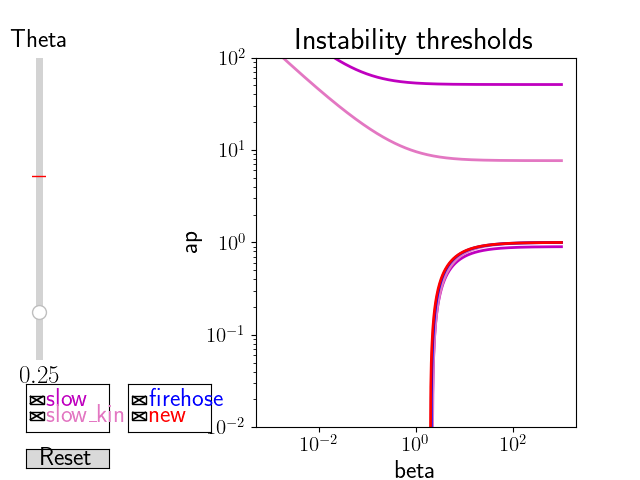

In [10]:
init_beta = 10**np.arange(-3,3,0.01)
init_theta = 0.25
x = init_beta
xlab = 'beta'
ylab = 'ap'
line = []
text = ['stable','instable','beta<0','beta>0']
color = []

# Init figure
fig, ax = plt.subplots()
ax.set_title('Instability thresholds')

line_slow_moins, = plt.plot(x, crit_slow_moins(init_beta,init_theta),'m', lw=2,label='slow')
line_slow_plus, = plt.plot(x, crit_slow_plus(init_beta,init_theta),'m', lw=2,label='slow')
color.append('m')
line.append([line_slow_moins,line_slow_plus])

line_slow_moins_kin, = plt.plot(x, crit_slow_moins(init_beta,init_theta,1),color='tab:pink', lw=2,label='slow_kin')
line_slow_plus_kin, = plt.plot(x, crit_slow_plus(init_beta,init_theta,1),color='tab:pink', lw=2,label='slow_kin')
color.append('tab:pink')
line.append([line_slow_moins_kin,line_slow_plus_kin])

line_firehose, = plt.plot(x, crit_new(init_beta,0),'b', lw=2,label='firehose')
color.append('b')
line.append([line_firehose])

line_new, = plt.plot(x, crit_new(init_beta,init_theta),'r',lw=2,label='new')
color.append('r')
line.append([line_new])

ax.set_xlabel(xlab)
ax.set_xscale('log')
ax.set_ylabel(ylab)
ax.set_yscale('log')
ax.set_ylim(0.01,100)
#ax.set_ylim(0,np.nanmax( crit_slow_plus(init_beta,init_theta)))

# Sliders
plt.subplots_adjust(left=0.40)

axtheta = plt.axes([0.05, 0.25, 0.0225, 0.63])
theta_slider = Slider(
    ax=axtheta,
    label="Theta",
    valmin=0,
    valmax=np.pi/2,
    valinit=init_theta,
    orientation="vertical", 
    **{'facecolor':'lightgrey'})
theta_slider.hline.set_ydata(100)
theta_slider.hline1 = axtheta.axhline(np.arctan(np.sqrt(2)), 0, 1, color='red', lw=1)

def update_theta(val):    
    beta = init_beta
    theta = theta_slider.val
    line[0][0].set_ydata(crit_slow_moins(beta,theta))
    line[0][1].set_ydata(crit_slow_plus(beta,theta))
    line[1][0].set_ydata(crit_slow_moins(beta,theta,1))
    line[1][1].set_ydata(crit_slow_plus(beta,theta,1))
    line[3][0].set_ydata(crit_new(beta,theta))
    fig.canvas.draw_idle()
theta_slider.on_changed(update_theta)

# CheckButtons Model incompressible
axl1 = plt.axes([0.04, 0.1, 0.13, 0.1])
labels1 = [str(l[0].get_label()) for l in line[:2]]
visibility1 = [l[0].get_visible() for l in line[:2]]
check1 = CheckButtons(axl1, labels1, visibility1)
for col in range(len(color[:2])):
    check1.labels[col].set_color(color[col])
def func1(label):
    index = labels1.index(label)
    for sub in range(len(line[index])):
        line[index][sub].set_visible(not line[index][sub].get_visible())
    plt.draw()
check1.on_clicked(func1)

# CheckButtons CGL 
axl2 = plt.axes([0.2, 0.1, 0.13, 0.1])
labels2 = [str(l[0].get_label()) for l in line[2:]]
visibility2 = [l[0].get_visible() for l in line[2:]]
check2 = CheckButtons(axl2, labels2, visibility2)
for col in range(len(color[2:])):
    check2.labels[col].set_color(color[col+2])
def func2(label):
    index = labels2.index(label)
    for sub in range(len(line[index+2])):
        line[index+2][sub].set_visible(not line[index+2][sub].get_visible())
    plt.draw()
check2.on_clicked(func2)

# Reset Button
resetax = plt.axes([0.04, 0.025, 0.13, 0.04])
reset_button = Button(resetax, 'Reset', hovercolor='0.975')
def reset(event):
    theta_slider.reset()
    c_slider.reset()
reset_button.on_clicked(reset)

plt.show()